In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
import math



import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms

import vizualizacia_funkcie as visual


from sklearn.experimental import enable_iterative_imputer 
from sklearn import impute 
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import base
from sklearn import compose
from datetime import datetime
from datetime import date
from sklearn.impute import KNNImputer

In [2]:
import category_encoders as ce

ModuleNotFoundError: No module named 'category_encoders'

In [3]:
df1 = pd.read_csv("./data/personal_train.csv", index_col=0)
df2 = pd.read_csv("./data/other_train.csv", index_col=0)

In [4]:
#moje su len vo vacsom dataframe
attributes_marcel = ["marital-status", "relationship", "occupation", "income", "workclass", 
                     "hours-per-week", "medical_info", "class"]

# Joinutie dataframov

In [5]:
print("Rozmer df1", df1.shape)
print("Rozmer df2", df2.shape)

print(len(df1["name"].unique()))
print(len(df1["address"].unique()))

print(len(df2["name"].unique()))
print(len(df2["address"].unique()))

Rozmer df1 (3933, 5)
Rozmer df2 (3983, 22)
3933
3933
3933
3933


Vidime, ze je rovnaky pocet unique values pre meno a adresu v obidvoch dataframoch. My totiz hladame najlepsi kluc, podla ktoreho by sme vedeli joinut obe dataframy dokopy. Sice maju rozdielne rozmery, ale minule, pri analyze, sme zistili, ze niektori pacienti maju pridelene 2 datarowy, kedy obe zaznamy su nie plne vyplnene - v zmysle, ze je mozne nasledne mergnut dane 2 zaznamy do jedneho, cim ziskavame jeden zaznam zo vsetkymi informaciami, ktore boli dostupne v tych dvoch zaznamoch.

In [6]:
key1 = sorted(list(df1["name"].unique() + " " + df1["address"].unique()))
key2 = sorted(list(df2["name"].unique() + " " + df2["address"].unique()))

key1[:10]

['Aaron Davis 379 Rodriguez Inlet\r\nFisherbury, MD 83114',
 'Aaron Dini 105 Medina Springs Suite 462\r\nEmilyland, KS 59124',
 'Aaron Gann 59685 Thomas Extension Apt. 142\r\nFieldsborough, UT 17996',
 'Aaron Gregg 10883 Williams Locks Suite 821\r\nEast Carmen, ME 31095',
 'Aaron Lindley 564 Stevenson Park Apt. 839\r\nRodriguezville, AR 73176',
 'Aaron Manning 9503 Christy Meadow\r\nAntoniostad, DC 31369',
 'Aaron Moody 5443 Kurt Estate\r\nHillbury, MS 07587',
 'Aaron Noman PSC 0351, Box 8841\r\nAPO AA 86063',
 'Aaron Robinson 16767 Medina Manor Suite 889\r\nCarlosshire, MD 96418',
 'Aaron Rogers 3257 Jones Center Apt. 917\r\nSeanland, OH 20838']

In [7]:
key1 == key2

True

Vidime, ze oba dataframy zdielaju rovnake informacie o pacientovi, konkretne o jeho mene a adrese. Tak mozeme tieto dva dataframy joinut na zaklade mena, pricom vymazeme prvotne adresu z jedneho dataframu

In [8]:
data = df1.drop(columns=["address"]).set_index("name").join(df2.set_index("name"), how="right").reset_index()
data

,name,age,sex,date_of_birth,address,race,marital-status,occupation,pregnant,education-num,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Aaron Davis,56,Female,1962-12-27,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",White,Divorced,Other-service,f,3.0,...,5th-6th,199298.0,0.0,41.806596,<=50K,"{'mean_oxygen':'1.647157191','std_oxygen':'14....",?,45.0,0.0,Local-gov
1,Aaron Dini,50,Male,1969-05-22,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",White,Divorced,Sales,f,10.0,...,Some-college,120939.0,0.0,53.615229,<=50K,"{'mean_oxygen':'1.380434783','std_oxygen':'15....",United-States,40.0,0.0,Self-emp-not-inc
2,Aaron Gann,25,Male,1994-07-26,59685 Thomas Extension Apt. 142\r\nFieldsborou...,Black,Never-married,?,f,4.0,...,7th-8th,107112.0,0.0,50.476073,<=50K,"{'mean_oxygen':'78.30183946','std_oxygen':'79....",United-States,30.0,0.0,?
3,Aaron Gregg,42,Female,1977-04-16,"10883 Williams Locks Suite 821\r\nEast Carmen,...",Black,Widowed,Transport-moving,f,9.0,...,HS-grad,157942.0,0.0,35.976649,<=50K,"{'mean_oxygen':'1.489130435','std_oxygen':'10....",United-States,40.0,0.0,Local-gov
4,Aaron Lindley,-4900,Female,1969-12-11 00:00:00,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",White,Never-married,Sales,F,9.0,...,HS-grad,156084.0,0.0,54.280153,<=50K,"{'mean_oxygen':'1.194816054','std_oxygen':'11....",United-States,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Young Provines,51,Male,1968-05-19,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA...",White,Married-civ-spouse,Exec_managerial,FALSE,11.0,...,Assoc-voc,83444.0,1.0,44.303479,>50K,"{'mean_oxygen':'3.16722408','std_oxygen':'22.3...",United-States,43.0,0.0,Private
3979,Zachary Grandfield,-5800,Male,1960/12/18,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, ...",Black,Married-civ-spouse,Transport-moving,f,10.0,...,Some-college,343849.0,1.0,29.456767,<=50K,"{'mean_oxygen':'2.994147157','std_oxygen':'21....",United-States,40.0,0.0,Private
3980,Zachary Miller,46,Male,1973-08-07,"96654 Marc Stream\r\nEast Cassandra, VT 84597",White,Married-civ-spouse,Adm-clerical,f,13.0,...,Bachelors,162327.0,0.0,43.191434,>50K,"{'mean_oxygen':'1.62541806','std_oxygen':'14.0...",?,50.0,1902.0,Private
3981,Zachary Seltzer,64,Female,1955-06-08 00 00 00,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",White,Divorced,Sales,f,7.0,...,11th,444089.0,1.0,34.132553,<=50K,"{'mean_oxygen':'66.53260870000001','std_oxygen...",United-States,40.0,0.0,Private


# Merguntie viacerych zaznamov jedneho pacienta

Podme sa teraz pozriet na problem mergovania dat dvoch zaznamov jedneho pacienta do jedneho datarowu. Ako priklad sme si zobrali cloveka, ktory ma 2 zaznamy v nasom datasete, pricom ako mozno vidiet, existuje zopar atributov, ktore su u jedneho zaznamu nullove, zatial co u druheho nie su. Prikladom je napriklad relationship.

In [9]:
daniel = data.loc[data["name"] == "Daniel Martin"]
print(daniel.iloc[0].isnull() ^ daniel.iloc[1].isnull())

daniel["relationship"]

name                False
age                 False
sex                 False
date_of_birth       False
address             False
race                False
marital-status      False
occupation          False
pregnant            False
education-num       False
relationship         True
skewness_glucose    False
mean_glucose         True
capital-gain        False
kurtosis_glucose    False
education           False
fnlwgt               True
class               False
std_glucose         False
income              False
medical_info         True
native-country      False
hours-per-week       True
capital-loss        False
workclass            True
dtype: bool


678     Husband
679         NaN
Name: relationship, dtype: object

Taktiez, niekto by mohol argumentovat, ze su to 2 rozlicne medicinske zaznamy rovnakeho pacienta, a nejde o jedno meranie, no toto sme uz minule vyvratili, staci sa pozriet na namerane hodnoty cloveku

In [10]:
daniel2 = daniel.dropna(axis=1)

daniel2.iloc[0] == daniel2.iloc[1]

name                True
age                 True
sex                 True
date_of_birth       True
address             True
race                True
marital-status      True
occupation          True
pregnant            True
education-num       True
skewness_glucose    True
capital-gain        True
kurtosis_glucose    True
education           True
class               True
std_glucose         True
income              True
native-country      True
capital-loss        True
dtype: bool

In [11]:
daniel2

,name,age,sex,date_of_birth,address,race,marital-status,occupation,pregnant,education-num,skewness_glucose,capital-gain,kurtosis_glucose,education,class,std_glucose,income,native-country,capital-loss
678,Daniel Martin,55,Male,1964-02-02,"1600 Shaun Drive Apt. 113\r\nEast Jacobmouth, ...",White,Married-civ-spouse,Prof-specialty,f,14.0,-0.575827,0.0,-0.065923,Masters,0.0,55.072854,>50K,United-States,1887.0
679,Daniel Martin,55,Male,1964-02-02,"1600 Shaun Drive Apt. 113\r\nEast Jacobmouth, ...",White,Married-civ-spouse,Prof-specialty,f,14.0,-0.575827,0.0,-0.065923,Masters,0.0,55.072854,>50K,United-States,1887.0


Ako mozno vidiet, ide o rovnake medicinske zaznamy, staci sa pozriet na merania glukozy, ktore su "nachlp" presne

In [12]:
#funckia, ktora mergne zaznamy, ktore su rovnake
def piece_datarows_together(data):
    
    data = data.copy().set_index("name")
    
    #toto nam vrati dataset, ktory obsahuje vsetky duplikaty, s ktorymi budeme pracovat
    #proste to vrati data, ktore maju index, ktory je v datasete viac ako raz pouzity
    duplicated = data[data.index.duplicated(keep=False)]
    
    index_values = duplicated.index.unique()
    
    #najprv vsetky hodnoty prenesieme do prveho vyskytu zaznamu daneho pacienta v datasete
    for idx in index_values:
        mini_dataset = duplicated.loc[idx] #toto vrati viacero zaznamov s rovnakych idx
        
        #zistim si, ktore atributy su nullove pre presne prvy zaznam a pre konkretne nullove atributy budem nadalej hladat
        #nenullovu hodnotu v ostatnych zaznamoch s rovnakym idx
        missing_mask = mini_dataset.iloc[0].isnull()
        attributes = mini_dataset.columns.values
        missing_attributes = attributes[missing_mask]
        
        #tu replacujem null hodnoty za nenullove
        for attr in missing_attributes:
            not_null = mini_dataset[attr][mini_dataset[attr].notnull()]
            
            if len(not_null) != 0:
                mini_dataset.iloc[0][attr] = not_null.values[0]
        
        
    #teraz uz mozme vymazat vsetky druhe, resp. ostatne zaznamy pacienta
    duplicated_mask = data.index.duplicated(keep="first")
    
    data = data.reset_index()
    duplicated_indices = data.index.values[duplicated_mask]
    
    
    return data.drop(index=duplicated_indices).reset_index(drop=True)


In [13]:
data = piece_datarows_together(data)

C:\Users\makoh\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
data

,name,age,sex,date_of_birth,address,race,marital-status,occupation,pregnant,education-num,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Aaron Davis,56,Female,1962-12-27,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",White,Divorced,Other-service,f,3.0,...,5th-6th,199298.0,0.0,41.806596,<=50K,"{'mean_oxygen':'1.647157191','std_oxygen':'14....",?,45.0,0.0,Local-gov
1,Aaron Dini,50,Male,1969-05-22,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",White,Divorced,Sales,f,10.0,...,Some-college,120939.0,0.0,53.615229,<=50K,"{'mean_oxygen':'1.380434783','std_oxygen':'15....",United-States,40.0,0.0,Self-emp-not-inc
2,Aaron Gann,25,Male,1994-07-26,59685 Thomas Extension Apt. 142\r\nFieldsborou...,Black,Never-married,?,f,4.0,...,7th-8th,107112.0,0.0,50.476073,<=50K,"{'mean_oxygen':'78.30183946','std_oxygen':'79....",United-States,30.0,0.0,?
3,Aaron Gregg,42,Female,1977-04-16,"10883 Williams Locks Suite 821\r\nEast Carmen,...",Black,Widowed,Transport-moving,f,9.0,...,HS-grad,157942.0,0.0,35.976649,<=50K,"{'mean_oxygen':'1.489130435','std_oxygen':'10....",United-States,40.0,0.0,Local-gov
4,Aaron Lindley,-4900,Female,1969-12-11 00:00:00,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",White,Never-married,Sales,F,9.0,...,HS-grad,156084.0,0.0,54.280153,<=50K,"{'mean_oxygen':'1.194816054','std_oxygen':'11....",United-States,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Young Provines,51,Male,1968-05-19,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA...",White,Married-civ-spouse,Exec_managerial,FALSE,11.0,...,Assoc-voc,83444.0,1.0,44.303479,>50K,"{'mean_oxygen':'3.16722408','std_oxygen':'22.3...",United-States,43.0,0.0,Private
3929,Zachary Grandfield,-5800,Male,1960/12/18,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, ...",Black,Married-civ-spouse,Transport-moving,f,10.0,...,Some-college,343849.0,1.0,29.456767,<=50K,"{'mean_oxygen':'2.994147157','std_oxygen':'21....",United-States,40.0,0.0,Private
3930,Zachary Miller,46,Male,1973-08-07,"96654 Marc Stream\r\nEast Cassandra, VT 84597",White,Married-civ-spouse,Adm-clerical,f,13.0,...,Bachelors,162327.0,0.0,43.191434,>50K,"{'mean_oxygen':'1.62541806','std_oxygen':'14.0...",?,50.0,1902.0,Private
3931,Zachary Seltzer,64,Female,1955-06-08 00 00 00,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",White,Divorced,Sales,f,7.0,...,11th,444089.0,1.0,34.132553,<=50K,"{'mean_oxygen':'66.53260870000001','std_oxygen...",United-States,40.0,0.0,Private


In [15]:
print(data["name"].value_counts())
data.loc[data["name"] == "Daniel Martin"]

Clarence Bagwell    1
Robert Michels      1
Kent Sallas         1
David Lucas         1
Bennie Jones        1
                   ..
Johnny Jasper       1
Bruce Reed          1
George Nelson       1
Ryan Peterson       1
Robert Mason        1
Name: name, Length: 3933, dtype: int64


,name,age,sex,date_of_birth,address,race,marital-status,occupation,pregnant,education-num,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
675,Daniel Martin,55,Male,1964-02-02,"1600 Shaun Drive Apt. 113\r\nEast Jacobmouth, ...",White,Married-civ-spouse,Prof-specialty,f,14.0,...,Masters,146659.0,0.0,55.072854,>50K,"{'mean_oxygen':'2.369565217','std_oxygen':'14....",United-States,NaN,1887.0,NaN


# Odstranenie useless atributov

Teraz, co sme uz joinli obidva dataframy a mergli datarowy, ktore boli z nejakeho dovodu rozdelene, sa mozeme pozriet na samotne atributy a spracovat ich.

V prvom rade vsak vyhodime atributy, ktore su uplne useless. Medzi nimi patri: 
- capital-gain 
- capital-loss

Dovodom, preco tieto mazeme, je ze 90% vsetkych ich hodnot su same 0.

Potom medzi dalsimi kandidatmi, ktore mozme hned vymazat budu:
- name
- date_of_birth - zatial ho nebudeme mazat, pouzijeme na imputaciu agu
- address - z tadialto chceme este precitat napriklad stat, v ktorom sa to robilo (najma sa teraz bavime o USA a ich statoch)
- fnlwgt - kedze nenasiel som ziadnu korelaciu medzi tymto vztahom a inymi ciselnymi hodnotami, ako aj nema korelaciu so samotnym prediction - class
- pregnant - je velmi malo tehotnych ludi necele 2%

In [16]:
data = data.drop(columns=["capital-gain", "capital-loss", "name", "fnlwgt", "pregnant"])

data.columns

Index(['age', 'sex', 'date_of_birth', 'address', 'race', 'marital-status',
       'occupation', 'education-num', 'relationship', 'skewness_glucose',
       'mean_glucose', 'kurtosis_glucose', 'education', 'class', 'std_glucose',
       'income', 'medical_info', 'native-country', 'hours-per-week',
       'workclass'],
      dtype='object')

Este stale mame dost atributov, ktore nemusia mat so predikciou cukrovky ziadnu suvislost. Ale vacsina tychto atributov sa najlepsie urci, ci su potrebne alebo nie, na zaklade samotneho trenovania modelu s a bez danych parametrov. 

Este, v priebehu tohto 2. zadania, sa pokusime najst nejake atributy, ktore nemaju vypovednu hodnotu, napriklad pomocou VarianceThreshold, ale teraz v datasete mame velke mnozstvo kategorickych hodnot, ako aj mnozstvo zle zformatovanych udajov, a tak skontrolovanie variancie jednotlivych atributov vykoname neskorsie, ked ich trosku spracujeme... Teraz sa budeme venovat jednotlivym atributom a ich spravovaniu. 

Nakoniec, ked budeme mat vykonane vsetky upravy nad atributmi, tak to vsetko spojime dokopy pouzivajuc triedy v scikit kniznici, ako napriklad Pipeline, ColumnTransform a pod.

# Preprocessing jednotlivych atributov

In [17]:
def identify_outliers(a):
    q25 = a.quantile(0.25)
    q75 = a.quantile(0.75)
    
    iqr = q75-q25
        
    lower = q25 - 1.5 * iqr
    upper = q75 + 1.5 * iqr
    
    return a[(a > upper) | (a < lower)]

Zbavime sa whitespacov vo vacsine stringovych atributoch...

In [18]:
data.columns

Index(['age', 'sex', 'date_of_birth', 'address', 'race', 'marital-status',
       'occupation', 'education-num', 'relationship', 'skewness_glucose',
       'mean_glucose', 'kurtosis_glucose', 'education', 'class', 'std_glucose',
       'income', 'medical_info', 'native-country', 'hours-per-week',
       'workclass'],
      dtype='object')

In [19]:
def string_formatting(col):
    
    if col.dtype == "O":
        col = col.apply(lambda row: row.strip() if row is not np.nan else row)
        col = col.apply(lambda row: np.nan if row is not np.nan and row == "?" else row)
    
    return col

data = data.apply(string_formatting)

AttributeError: 'int' object has no attribute 'strip'

### class

Tomuto atributu chyba zopar hodnot, konkretne 9, a tak datam by sme neublizili, pokial by sme ich jednoducho dropli. Kludne by sme mohli aj imputovat dane hodnoty, mame dobre atributy so silnymi korelaciami s tymto atributom, a tak by sme sa hrali, ze vlastne uz robime danu klasifikacnu ulohu, ako keby, no tento atribut ma cisto obsahovat len ground truth, a tak, aby sme boli korektny, mali by sme missing value odstranit.

In [20]:
idx = data[data["class"].isnull()].index.values
data = data.drop(index=idx)

### marital-status a relationship

#### marital-status

 Married-civ-spouse       1842
 Never-married            1232
 Divorced                  545
 Separated                 139
 Widowed                   115
 Married-spouse-absent      41
 Married-AF-spouse           3
Name: marital-status, dtype: int64


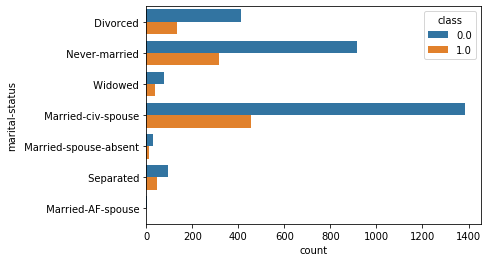

In [21]:
visual.univariate_categ_to_class(data, "marital-status")

Zbavime sa malo pocetnych kategorii a skombinujeme ich vsetky do kategorie "Other"

In [22]:
def marital_status_categories(row):
    
    ms = row["marital-status"]
        
    if ms is not np.nan and ms not in ("Divorced", "Never-married", "Married-civ-spouse"):
        row["marital-status"] = "Other"
        
    return row

In [23]:
data = data.apply(marital_status_categories, axis=1)

Na imputovanie missing values planujem pouzit atribut **relationship**, tak najprv na ten sa taktiez musime pozriet, a jemu znizit pocet kategorii, az potom budeme moct vyberat sposoby, ako imputovat missing values.

#### relationship

 Husband           1619
 Not-in-family      963
 Own-child          601
 Unmarried          424
 Wife               193
 Other-relative     117
Name: relationship, dtype: int64


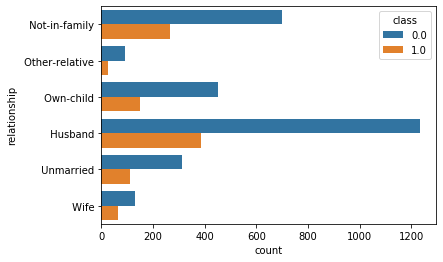

In [24]:
visual.univariate_categ_to_class(data, "relationship")

Znova mozme malopocetne kategorie spojit dokopy a nasledne vykoname bivariate analyzu medzi tymto atributom a marital-status, aby sme urcili, ci sme vybrali vhodny styl kategorizacie.

In [25]:
def relationship_categories(row):
    
    rel = row["relationship"]
        
    if rel is not np.nan and rel not in ("Not-in-family", "Husband", "Own-child"):
        row["relationship"] = "Other"
        
    return row

In [26]:
data = data.apply(relationship_categories, axis=1)

In [27]:
data[["relationship", "marital-status"]].isnull().sum()

relationship      7
marital-status    7
dtype: int64

Teraz sa sustredime na missing values

In [28]:
def categ_impute_iterativeImputer(data, columns, initial_strategy="most_frequent", 
                                  max_iter=20, join=True):

    data = data.copy()
    
    X = data[columns]
    
    #do datasetu vkladame ako prvy zaznam same null hodnoty, lebo OrdinalEncoder je celkom hlupy v tomto zmysle pri praci s null hodnotami
    #lebo i ked mu poviete, aby ignoroval null hodnoty, ked ju uvidi po prvy krat, tak sice ju nezakoduje, ale inkrementne encoding hodnoty,
    #co pri iterative imputerovi, kde chcem vediet min hodnotu a max hodnotu encodingu je zle, lebo pokial by som dostal null hodnotu v strede
    #datasetu, tak dana null hodnota zoberie nejaku stredne cislo pre encoding, a zle mi bude vyhodnocovat iterative imputer
    #jednoduchsie je, ked takto feedneme mu hned na zaciatku null hodnoty, vdaka ktorym sa inkrementne hodnota pri encodingu, no uz potom nas
    #nic neprekvapi a hodnoty daneho atributu su cele cisla v rozmedzi medzi 2 a nejakym inym cislom - zatial, co keby sme nedali na zaciatok
    #null hodnotu, tak by sme mali cisla od 1 po ine cislo, kedy by mohlo byt v danom rangy jedno cislo preskocene - nevhodne pre iterativeimputer
    null_values = pd.DataFrame(index=pd.Index([-1]), columns=columns, data=[[np.nan for i in range(len(columns))]])
    X = pd.concat([null_values,X])

    #encodovanie kategorickych atributov
    encoder = ce.ordinal.OrdinalEncoder(handle_missing="return_nan", handle_unknown="return_nan")
    X = encoder.fit_transform(X)
    
    #zbavanie sa null hodnot
    X = X[1:]

    
    iterative_impute = impute.IterativeImputer(max_iter=20, random_state=42, initial_strategy="most_frequent", 
                                              min_value=X.min(), max_value=X.max())


    #prvy krat vzdycky hodi iterative imputer nejaky error, ale druhy krat mu to uz nevadi... zaujimave
    try:
        X = iterative_impute.fit_transform(X).round()
    except (ValueError, np.linalg.LinAlgError):
        print("Jeden error bol trapnuty, kedy funkcii vadili NaNs. Tento error je ale divny, lebo mu to vadi", \
              "len prvy krat, a potom to uz ide...")
        X = iterative_impute.fit_transform(X).round()
    
    
    X = pd.DataFrame(data=X, columns=columns)    
    
    
    #tu uz len zo encodingu chceme naspat stringy - dovodom je ten, ze chceme este hodnoty pouzit pri analyze
    #plus pre niektore atributy budeme chciet skor OneHotEncoding
    if join:
        
        X = encoder.inverse_transform(X)
        data[columns] = X
        return data
        
    else:
        return encoder.inverse_transform(X)



Potom mozno najedme dalsie pomocne atributy, ktore nam lepsie pomozu pri estimacii missing values...

In [29]:
#tento prikaz je zaujimavy v tom, ze prvykrat, ked sa callne, mu vadi NaN values, no druhykrat uz nie
data = categ_impute_iterativeImputer(data, ["relationship", "marital-status"])

NameError: name 'ce' is not defined

Takto vyzeraju nase atributy uz so vsetkymi hodnotami

Other    3917
Name: relationship, dtype: int64


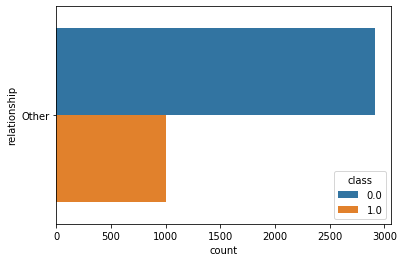

In [30]:
visual.univariate_categ_to_class(data, "relationship")

Other    3917
Name: marital-status, dtype: int64


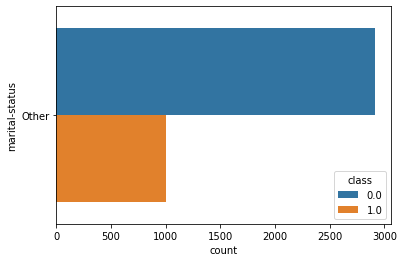

In [31]:
visual.univariate_categ_to_class(data, "marital-status")

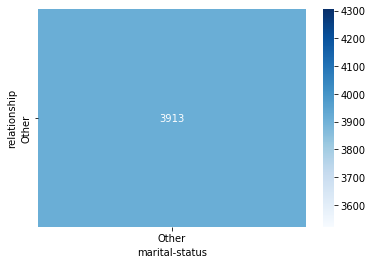

In [32]:
visual.bivar_2cats(data=data, x="marital-status", y="relationship")

### Skupina atributov: occupation, workclass, income, hours-per-week

#### occupation

Upraceme kategorie v tomto atribute. Vsetky mozne hodnoty boli zduplikovane, kedy v jednej variante sa pouzivali "-", zatial co v druhej "_"

In [33]:
data["occupation"] = data["occupation"].apply(lambda row: np.nan if row is not np.nan and row == "?" else row)
data["occupation"] = data["occupation"].apply(lambda row: row.strip().replace("_", "-") if row is not np.nan else row)

Craft-repair         522
Prof-specialty       494
Exec-managerial      480
Adm-clerical         472
Sales                430
Other-service        399
Machine-op-inspct    241
?                    229
Transport-moving     195
Handlers-cleaners    162
Tech-support         106
Farming-fishing      104
Protective-serv       72
Priv-house-serv       12
Armed-Forces           1
Name: occupation, dtype: int64


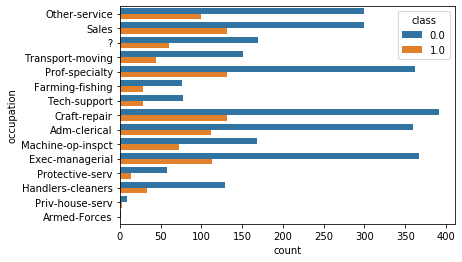

In [34]:
visual.univariate_categ_to_class(data, "occupation")

Malo pocetne hodnoty mozeme mergnut do jednej hodnoty, no ako sme minule vraveli, nemyslime si, ze tento atribut je extra vypovedny pre nasu klasifikacnu ulohu. Avsak mozme ho mierne spracovat a doplnit mu missing values, aby sme neskor v modeli mohli otestovat, ci nam pomaha pri klasifikacii alebo nie. Mergneme 6 najmenej poslednych kategorii do jendej.

In [35]:
def occupation_categories(row):

    occ = row["occupation"]
    
    if occ is not np.nan and occ not in ("Craft-repair", "Prof-specialty", "Exec-managerial", 
                                         "Adm-clerical", "Sales", "Other-service", "Machine-op-inspct", 
                                         "Transport-moving"):
        
        row["occupation"] = "Other"
        
    return row

In [36]:
data = data.apply(occupation_categories, axis=1)

Other                686
Craft-repair         522
Prof-specialty       494
Exec-managerial      480
Adm-clerical         472
Sales                430
Other-service        399
Machine-op-inspct    241
Transport-moving     195
Name: occupation, dtype: int64


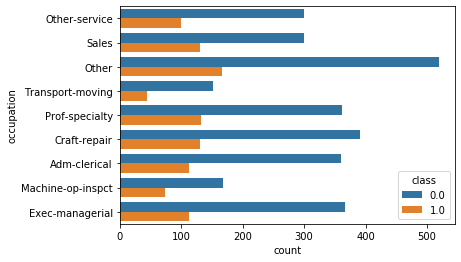

In [37]:
visual.univariate_categ_to_class(data, "occupation")

#### workclass

 Private             2754
 Self-emp-not-inc     288
 Local-gov            252
 ?                    226
 State-gov            145
 Self-emp-inc         130
 Federal-gov          119
 Never-worked           2
 Without-pay            1
Name: workclass, dtype: int64


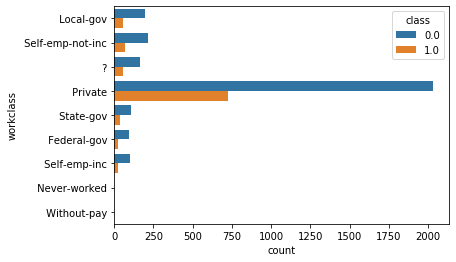

In [38]:
visual.univariate_categ_to_class(data, "workclass")

Tu mergneme vsetky kategorie, ktore nie su private...

In [39]:
def workclass_categories(row):

    wc = row["workclass"]
    
    if wc is not np.nan and wc != "Private":
        row["workclass"] = "Non-private"
        
    return row

In [40]:
data = data.apply(workclass_categories, axis=1)

Non-private    3917
Name: workclass, dtype: int64


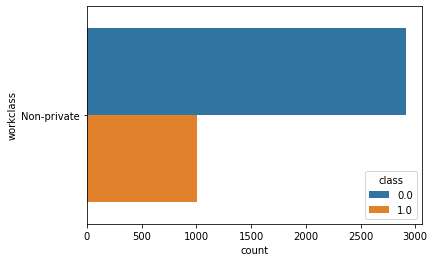

In [41]:
visual.univariate_categ_to_class(data, "workclass")

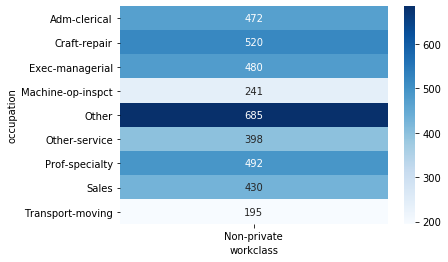

In [42]:
visual.bivar_2cats(data=data, x="workclass", y="occupation")

In [43]:
data[["workclass", "occupation", "income", "hours-per-week"]].isnull().sum()

workclass         7
occupation        5
income            5
hours-per-week    9
dtype: int64

Ako mozno vidiet, je velke mnozstvo NaN hodnot, ktore potrebujeme vyriesit. Mohli by sme ich odstranit, najma pokial by sme nemali ine atributy, podla ktorych by sme mohli imputovat hodnoty, no kvoli tomu, ze je ich tolko vela na imputaciu, tak pouzijeme viacero atributov dokopy, ktore pouzijeme do IterativeImputer na doplnenie missing values.

Este predtym, nez vykoname spominanu imputaciu missing values, treba predspracovat ostatne atributy.

In [44]:
#tato funkcia sluzi len na vizualizaciu aplikacie nonlinearnych transformacii na distribuciu a pocet outlierov
#vdaka nej sa mozme rozhodnut, ci chceme 
def resolving_outliers_transformations(data, column, power_method="yeo-johnson", apply_transformation=None,
                                       figsize=None):
    
    transformers = [
        preprocessing.PowerTransformer(method=power_method),
        preprocessing.QuantileTransformer(output_distribution="normal")
    ]
    
    transf_names = ["PowerTransformer", "QuantileTransformer"]
    
    #uz chcem aplikovat konkretnu kombinaciu
    if apply_transformation is not None:
        
        data = data.copy()
        indices = data.index
        
        idx = transf_names.index(apply_transformation)
        new_data = transformers[idx].fit_transform(data[[column]])
        
        data[column] = pd.Series(new_data.reshape(-1), index=indices)
        
        return data
        
    
    for transf, name in zip(transformers, transf_names):

        transformed = transf.fit_transform(data[[column]])
    
        outliery = identify_outliers(pd.Series(transformed.reshape(-1)))
        
        if name == "PowerTransformer":
            print(name, "| metoda:", power_method)
        else:
            print(name)
            
        print("Pocet outlierov:", len(outliery))
    
        visual.f(figsize)
        sns.distplot(transformed)
        plt.show()
    


In [45]:
#tato funkcia sluzi na zistenie poctu outlierov, pokial distribuciu atributu rozdelime na dvoje, podla hodnoty clz
def outliers_per_distributions_to_class(data, column, clz="class"):
     
    data_y0 = data[data[clz] == 0][column]
    data_y1 = data[data[clz] == 1][column]
    
    out1 = identify_outliers(data_y0)
    out2 = identify_outliers(data_y1)
    
    print("Pocet outlierov pri y=0 je:", len(out1))
    print("Pocet outlierov pri y=1 je:", len(out2))
    
    return len(out1) + len(out2)
    

In [46]:
#tato funkcia sluzi pre zistenie idealnej kombinacie, ako vyriesit outliery pre dolezite atributy, teda tie, ktore 
#maju silnu korelaciu z target atributom 
#typicky to pouzivame prave pri atributoch o glukoze ci kysliku
#vyskusaju sa vsetky kombinacie, teda vyskusa sa na vyriesenie outlierov najprv nonlinearne transformacie, ci odstranenie samotnych
#outlierov. Taktiez sa vyskusa rovno odstranit outliery z novych distribucii, ktore boli vytvorene transformaciami

#apply_combination je metoda, ktorou vykonas urcite operacie, ktore si si vybral pri predchadzajucom volani tejto funkcie
#apply_combination(nazov_transformatora, True/False pre odstranenie outlierov)
def resolving_outliers_transformations_to_class(data, column, clz="class", remove_outliers=True, apply_combination=None,
                                                power_method="yeo-johnson", figsize=None):

    
    transformers = [
        preprocessing.PowerTransformer(method=power_method),
        preprocessing.QuantileTransformer(output_distribution="normal"),
        None
    ]
    
    transformers_names = ["PowerTransformer", "QuantileTransformer", None]
    
    #uz chcem aplikovat konkretnu kombinaciu
    if apply_combination is not None:
        
        #aplikujeme transformaciu
        if apply_combination[0] is not None:

            data = data.copy()
            indices = data.index
            
            idx = transformers_names.index(apply_combination[0])
            
            new_data = transformers[idx].fit_transform(data[[column]])

            data[column] = pd.Series(new_data.reshape(-1), index=indices)
        
            
            #pokial aplikujeme aj odstranovanie outlierov
            if apply_combination[1] == True:
                data = removing_outliers_per_class(data, column, clz=clz, show_plot=False)
        
        #neaplikujeme transformaciu, teda jedine, co robime, je odstranovanie outlierov z distribucii 
        #podla target atributu
        else:
            data = removing_outliers_per_class(data, column, clz=clz, show_plot=False)
        
        
        return data
    
    for transf,name in zip(transformers, transformers_names):
    
        indices = data.index
    
        #pokial aplikujem nejaku transformaciu
        if transf is not None:
            new_data = transf.fit_transform(data[[column]])
            data["new_data"] = pd.Series(new_data.reshape(-1), index=indices)
    
            if name == "PowerTransformer":
                print(name, "| metoda:", power_method)
            else:
                print(name)
                
            pocet_outlierov = outliers_per_distributions_to_class(data, "new_data", clz=clz)
        
            visual.f(figsize)
            visual.univariate_num_to_class(data, "new_data", clz=clz, figsize=figsize, show_regplot=False)
                
        #pokial skusame vymazavat outliery...
        if remove_outliers == True:
            
            #pokial aplikujeme nejaku transformaciu
            if transf is not None:
                print("\n")
                print("Vyskusame odstranit vsetky outliery z danej hornej distribucie")
            
            #pokial neaplikueme ziadnu transformaciu
            else:
                data["new_data"] = data[column]
                pocet_outlierov = outliers_per_distributions_to_class(data, "new_data", clz=clz)
                print("Bez transformacie - vyskusame len odstranit outliery")
                
            
           
            print("Pocet outlierov na odstranenie:", pocet_outlierov)
            removing_outliers_per_class(data, "new_data", clz=clz, figsize=figsize)
    
        print("\n------------------------------------------\n")
    
    data = data.drop(columns=["new_data"])
    
    

In [47]:
def removing_outliers_per_class(data, column, clz="class", show_plot=True, figsize=None):
    
    data = data.copy()
    
    data_y0 = data[data[clz] == 0][column]
    data_y1 = data[data[clz] == 1][column]
        
    idx = identify_outliers(data_y0).index.values
    data = data.drop(index=idx)

    idx = identify_outliers(data_y1).index.values
    data = data.drop(index=idx)
    
    if show_plot == True:
        visual.f(figsize)
        visual.univariate_num_to_class(data, column, show_regplot=False)
    
    return data
    

#### hours-per-week

Pocet outlierov: 1086
Korelacia medzi nasim atributom a y: -0.022582040803000948


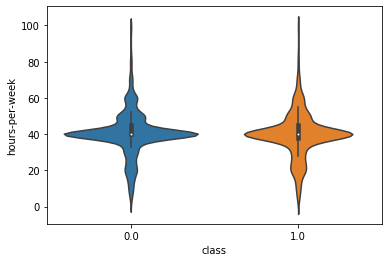

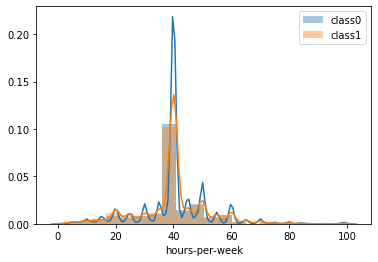

In [48]:
outliery = identify_outliers(data["hours-per-week"])
print("Pocet outlierov:", len(outliery))
visual.univariate_num_to_class(data, "hours-per-week", show_regplot=False)

PowerTransformer | metoda: yeo-johnson
Pocet outlierov: 1086


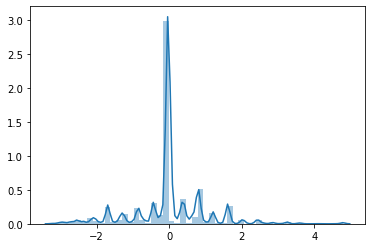

QuantileTransformer
Pocet outlierov: 603


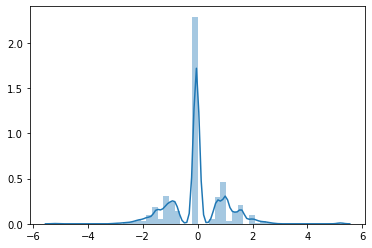

In [49]:
resolving_outliers_transformations(data, "hours-per-week")

Je tu velke mnozstvo outlierov, ktore nemozeme len tak vymazat. Skusal som uz predtym aplikovat na tuto distribuciu viacero transformacii, ako PowerTransform alebo QuantileTransform, aby som transformoval spominane outliery, no bez uspechu. Dovodom, preco je tolko vela dat povazovanych za outlierov je, ze IQR je strasne maly. 

Rozhodol som sa, ze zkategorizujem tento atribut, cim vlastne aj mierne sa zbavim problemu outlierov.

In [50]:
print(data["hours-per-week"].quantile(0.25))
print(data["hours-per-week"].quantile(0.70))
print(data["hours-per-week"].quantile(0.75))

40.0
40.0
45.0


In [51]:
def categorize_hours(row):
    
    hour = row["hours-per-week"]
    
    if math.isnan(hour):
        row["hours-per-week-cat"] = math.nan
    elif hour <= 35:
        row["hours-per-week-cat"] = "<=35"
    elif hour <= 45:
        row["hours-per-week-cat"] = "35< hours <=45"
    elif hour > 45:
        row["hours-per-week-cat"] = ">45"        

    return row
        
data["hours-per-week-cat"] = 0
data = data.apply(categorize_hours, axis=1)

35< hours <=45    2254
<=35               837
>45                824
Name: hours-per-week-cat, dtype: int64


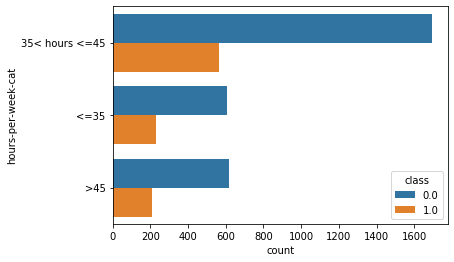

In [52]:
visual.univariate_categ_to_class(data, "hours-per-week-cat")

#### income

Pre tento atribut netreba nic riesit, len imputaciu hodnot, co vsak vykoname spolu s ostatnymi atributmi

 <=50K    2663
 >50K      863
<=50K      296
>50K        97
Name: income, dtype: int64


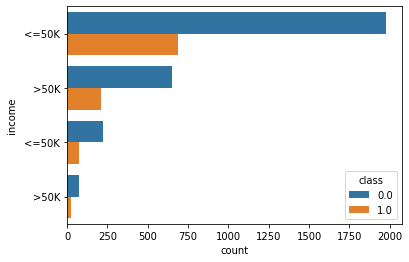

In [53]:
visual.univariate_categ_to_class(data, "income")

## Tu chceme pridat aj to education

In [54]:
data = data.drop(columns=["hours-per-week"])
data = categ_impute_iterativeImputer(data, ["occupation", "workclass", "income", "hours-per-week-cat"], max_iter=20)

NameError: name 'ce' is not defined

Podme sa teraz pozriet najma na atributy occupation a workclass, ktorym velkme mnozstvo hodnot chybalo

Other                686
Craft-repair         522
Prof-specialty       494
Exec-managerial      480
Adm-clerical         472
Sales                430
Other-service        399
Machine-op-inspct    241
Transport-moving     195
Name: occupation, dtype: int64


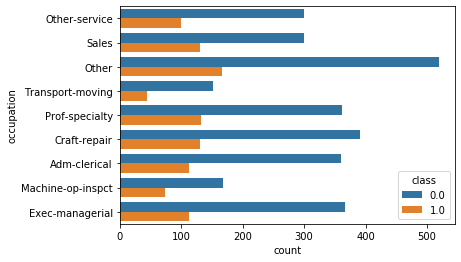

In [55]:
visual.univariate_categ_to_class(data, "occupation")

Non-private    3917
Name: workclass, dtype: int64


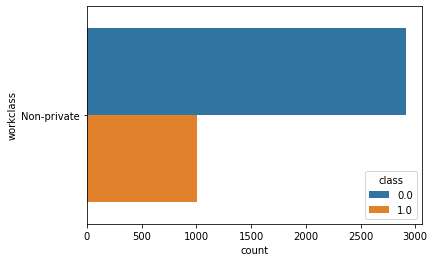

In [56]:
visual.univariate_categ_to_class(data, "workclass")

### Atribut native_country

# FEEDBACK ---------------------------------------------------------------------

skoro vsade sa pouzivaju "-", nie "_", plus je to aj tak jedno, takze som ti do odkomentoval :P

In [57]:
#data = data.rename(columns = {'native-country':'native_country'})

# FEEDBACK ---------------------------------------------------------------------

tu si robil veci, ako odstranenie medzier ci replacnutie ? za nan, no to vsetko je uz spravene hore nejakou funkciou, ktora, pokial sa nemylim, ti nesla spustit, tak si zariad, aby ti sla :P - funkcia string_formatting

to iste plati aj pre category_encoders, aby ti sli

vkuse pouzivas `data.info()`, kedy netusim, ze preco... je to velke a nic nam to nepovie

In [58]:
def native_country_categories(row):

    nc = row["native-country"]
    
    if nc is not np.nan and nc not in ("United-States"):
        row["native-country"] = "Other"
        
    return row

In [59]:
data = data.apply(native_country_categories, axis=1)

Other    3921
Name: native-country, dtype: int64
Pocet percent ludi z USA: 0.0


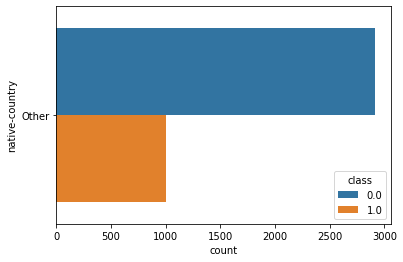

In [60]:
visual.univariate_categ_to_class(data, "native-country")
print("Pocet percent ludi z USA:", len(data[data["native-country"] == "United-States"]) / len(data))

Tento atribut, aj po mergnuti vsetkych krajin do jednej, neratajuc USA, stale drtiva vacsina je z USA, a teda ma dany atribut malu varianciu, tak ho vymazeme...

In [61]:
data = data.drop(columns=["native-country"])

### Atribut race

V prvej fáze sme zistili že početnosť white previšuje všetký ostatné mnohonásobne. Rozhodli sme sa zvyšné rasy mergnut do jednej ktorú sme pomenovali "other"

 White                 3352
 Black                  382
 Asian-Pac-Islander     127
 Amer-Indian-Eskimo      33
 Other                   26
Name: race, dtype: int64


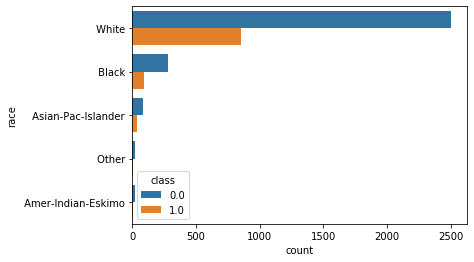

In [62]:
visual.univariate_categ_to_class(data, "race")

In [63]:
def race_categories(row):
    
    race = row["race"]
        
    if race is not np.nan and race not in ("White"):
        row["race"] = "Other"
        
    return row

In [64]:
data = data.apply(race_categories, axis=1)

Other    3920
Name: race, dtype: int64
Pocet percent bielych ludi: 0.0


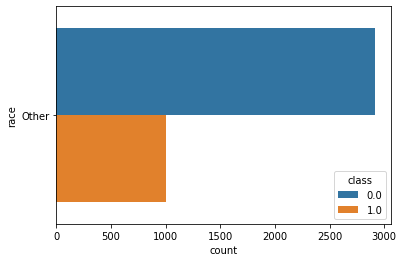

In [65]:
visual.univariate_categ_to_class(data, "race")
print("Pocet percent bielych ludi:", len(data[data["race"] == "White"]) / len(data))

Ako v pripade native-country, tak tento atribut mozeme vymazat, lebo ma malu varianciu.

In [66]:
data = data.drop(columns=["race"])

# NEZABUDNI SPRAVIT education + education-num
### Atribut education 

In [67]:
data["education"] = data["education"].apply(lambda row: row.strip() if row is not np.nan else row)

data["education"].unique()

array(['5th-6th', 'Some-college', '7th-8th', 'HS-grad', 'Masters',
       'Bachelors', '10th', 'Doctorate', '9th', 'Assoc-voc',
       'Prof-school', 'Assoc-acdm', '11th', '12th', nan, 'Preschool',
       '1st-4th'], dtype=object)

HS-grad         1310
Some-college     854
Bachelors        615
Masters          213
Assoc-voc        161
Assoc-acdm       154
11th             128
10th             117
7th-8th           88
Prof-school       66
12th              58
Doctorate         51
9th               47
5th-6th           36
1st-4th           16
Preschool          6
Name: education, dtype: int64


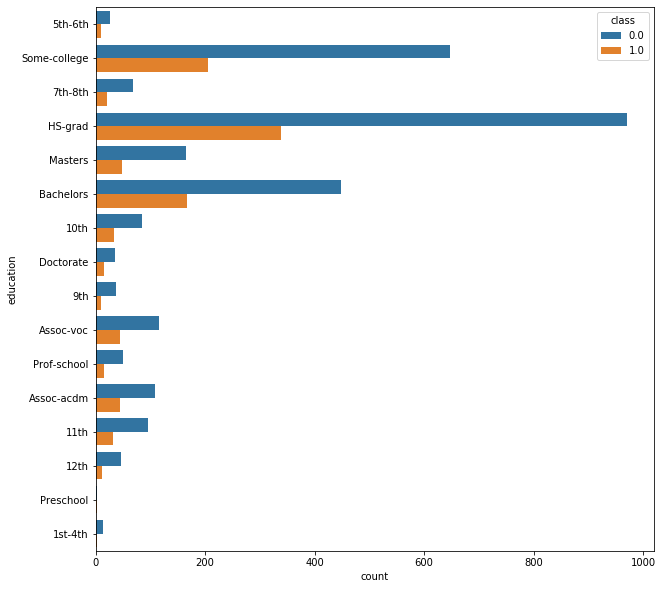

In [68]:
visual.univariate_categ_to_class(data, "education", figsize=(10,10))

In [69]:
data["simple-edu"] = data["education"].copy()

In [70]:
def simplify_education(row):
        
    edu = row["education"]
        
    if edu is np.nan:
        row["simple-edu"] = edu
        
    elif re.match("^([0-9][a-zA-Z])|(1[0-2][a-zA-Z])", edu) or edu == "Preschool":
        row["simple-edu"] = "Attending-school"
        
    elif edu in ["Assoc-acdm", "Assoc-voc", "Prof-school"]:
        row["simple-edu"] = "Edu after HS, no uni"
        
    elif edu in ["Masters", "Doctorate"]:
        row["simple-edu"] = "Masters/Doctorate"
        
    else:
        row["simple-edu"] = row["education"]
    
    return row
        
data = data.apply(simplify_education, axis=1)

In [71]:
data = data.drop('education', axis=1)

In [72]:
data = data.rename(columns = {'simple-edu':'education'})

HS-grad                 1310
Some-college             854
Bachelors                615
Attending-school         496
Edu after HS, no uni     381
Masters/Doctorate        264
Name: education, dtype: int64


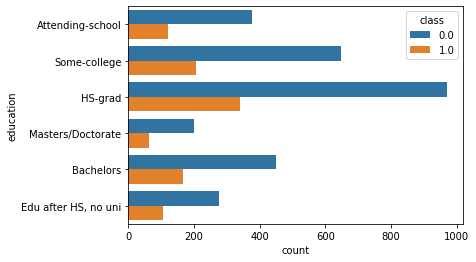

In [73]:
visual.univariate_categ_to_class(data, "education")

In [74]:
#znova som ti vymazal veci, co uz su vykonane predoslou funkciou (string_formatting)

### Atribut education-num

9.0     1311
10.0     853
13.0     615
14.0     212
11.0     161
12.0     153
7.0      128
6.0      117
4.0       88
15.0      66
8.0       58
16.0      51
5.0       47
3.0       36
2.0       16
1.0        6
Name: education-num, dtype: int64


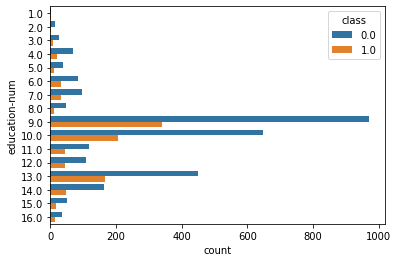

In [75]:
visual.univariate_categ_to_class(data, "education-num")

count    3918.000000
mean       10.081674
std         2.543663
min         1.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        16.000000
Name: education-num, dtype: float64
Skewness: -0.27776156509825417
Kurtosis: 0.636706777209934


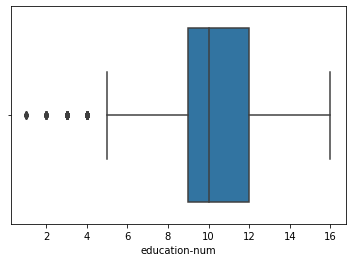

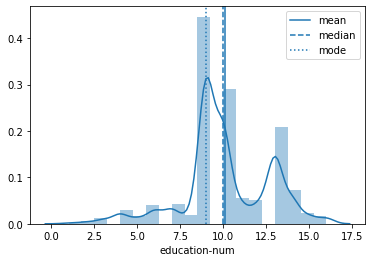

In [76]:
visual.univariate_num(data, "education-num")

In [77]:
data[["education", "education-num"]].isnull().sum()

education        4
education-num    6
dtype: int64

Ideme sa pozriet na missing values 

In [78]:
imputer = KNNImputer(n_neighbors = 2)
data = imputer.fit_transform(data[['education','education-num']])

ValueError: could not convert string to float: 'Attending-school'

TOTO Budem dorabat

### Atribut address

# FEEDBACK ---------------------------------------------------

Ziskaj cisto meno mesta zo stringu, a pokial tam nebudu nejake velkopocetne skupiny, povezdme, ze zo 50 ludi z rovnakeho mesta, tak sa pozrieme na stat, teda vycitas stat (zvacsa to je USA, takze tie 2 pismenka) a tiez zistime, kolko ludi je v danych statoch

Pouzijes visual.univariate_categ_to_class pokial su tam nejak zgroupeny ludia

In [79]:
len(data["address"].unique())

3924

In [80]:
data[['street','city']] = data.address.str.split('\r\n', expand = True)

In [81]:
data = data.drop(columns=["address"])

Rozparsujeme si atribut addressdo dvoch novych atributov 
Nasledne si overime ci nam chybaju nejake data

In [82]:
data.street.isnull().sum()

0

In [83]:
data.city.isnull().sum()

0

Pozrieme sa na mesto a stat ci maju vypovednu hodnotu

In [84]:
data[['city1','state1']] = data.city.str.split(',', expand = True)

In [85]:
data[['state','postcode']] = data.state1.str.split(expand = True)

In [86]:
data.drop(['street', 'city', 'state1', 'postcode'], axis=1, inplace=True)

In [87]:
data.rename(columns = {'city1':'city'}, inplace = True)

In [88]:
data["city"].unique()

array(['Fisherbury', 'Emilyland', 'Fieldsborough', ..., 'East Cassandra',
       'Perkinsmouth', 'South Kevinside'], dtype=object)

Tento atribut cely mazeme nie su tam ziadne velko pocetne udaje pri jednom meste

In [89]:
data["state"].unique()

array(['MD', 'KS', 'UT', 'ME', 'AR', 'DC', 'MS', None, 'OH', 'DE', 'CO',
       'TX', 'NH', 'IN', 'MI', 'WY', 'OK', 'HI', 'PA', 'NJ', 'AZ', 'AK',
       'WA', 'SC', 'OR', 'NV', 'WV', 'SD', 'NM', 'WI', 'GA', 'VA', 'NE',
       'VT', 'IL', 'KY', 'MT', 'ND', 'ID', 'NC', 'MA', 'NY', 'FL', 'MN',
       'LA', 'TN', 'RI', 'CA', 'IA', 'MO', 'CT', 'AL'], dtype=object)

Myslim ze toto mozeme dropnut cele

In [90]:
data.drop(['city'], axis=1, inplace=True)

In [91]:
data.drop(['state'], axis=1, inplace=True)

### Atribut date_of_birth

In [92]:
import re
dates = []

for index,row in data.iterrows():
    dates.append(re.sub('\d', '*',  row['date_of_birth']))
    
dates = list(set(dates))
dates

['****/**/**',
 '**-**-**',
 '****-**-** ** ** **',
 '****-**-** **:**:**',
 '**/**/****',
 '****-**-**']

Vidime ze v date_of_birth su rozne formaty datumov. V nasledujucej casti ich upravime na rovnaky format

In [93]:
import re
from datetime import datetime

for index,row in data.iterrows():
    line = row['date_of_birth']
    if re.match(r"^\d{2}-\d{2}-\d{2}$", line):
        regex1 = line[0:2]
        regex2 = line[3:5]
        regex3 = line[6:8]
        
        verbose = False
        if (verbose == True):
            if (int(regex1) > 31):
                print('Prvy udaj > 31: ',regex1)
            if (int(regex2) > 31):
                print('Druhy udaj > 31: ',regex2)
            if (int(regex3) > 31):
                print('Treti udaj > 31: ',regex3)

Overili sme si ze prvy udaj je rok, upravime to tak ze skrateny rok nahradime celym rokom. Napr. 67 - 1967

In [94]:
data['date_of_birth'] = data['date_of_birth'].map(lambda x: x[:10])

Odstranili sme cas

In [95]:
import re
dates = []

for index,row in data.iterrows():
    dates.append(re.sub('\d', '*',  row['date_of_birth']))
    
dates = list(set(dates))
dates

['****/**/**', '**-**-**', '**/**/****', '****-**-**']

Mame 4 rozne formaty datumov

In [96]:
import re
from datetime import datetime

for index,row in data.iterrows():
    line = row['date_of_birth']
    dateObj = None
    if re.match(r"^\d{2}-", line):
        newDate = '19' + line
        dateObj = datetime.strptime(newDate,'%Y-%m-%d')
    elif re.match(r"^\d{4}-", line):
        dateObj = datetime.strptime(line,'%Y-%m-%d')
    elif re.match(r"^\d{4}/", line):
        dateObj = datetime.strptime(line,'%Y/%m/%d')
    elif re.match(r"^\d{2}/", line):
        dateObj = datetime.strptime(line,'%d/%m/%Y')
    data.at[index,'date_of_birth'] = dateObj.strftime('%d-%m-%Y')

In [97]:
data['date_of_birth'].head()

0    27-12-1962
1    22-05-1969
2    26-07-1994
3    16-04-1977
4    11-12-1969
Name: date_of_birth, dtype: object

Datum sme nakoniec upravili do jedneho formatu pre vsetky zaznami

In [98]:
data["date_of_birth"].isnull().sum()

0

### Atribut age

In [99]:
data.age.unique()

array([   56,    50,    25,    42, -4900,    47,    74,    60,    72,
          61,    43,    52,    70,    57,    63,    54,    67, -3700,
          45,    75,    36,    41,    64,    46,    33,    77,    48,
        6900,    30,    37, -5200,    28,    65, -5800,    59,    68,
          69,    66,    53,    22, -5700, -4300,    58,    51,    38,
          29,    39,    35, -5400,    49,    17,    31,  5000,    62,
        6100,  5100,    44,    34,  5800,  3700, -4400, -5600,    -1,
        5300, -5300,  5400, -6900,    55,  4700,  7800,  6400, -6800,
          40, -5100,    73,  5200, -4800, -4000,  5900,  3200,  4500,
          26, -6200,  7100,  5600, -6400,  4000,  5700,    79,    90,
        7000,  6800,    82,     3,    23,    19,    81,  3600, -6700,
          80,     7, -3300,    76,    27,    71,    83, -3800, -5500,
       -5900, -4600,  4200,  4800,    16, -8600, -6500,    84,  6200,
       -8000, -5000,  4300,    18, -6000,  2900, -4500,  3800,    32,
          24,    21,

Vidime ze age ma nekorektne hodnoty, tento stlpec si dropneme a na zaklade date_of_birth si vytvorime novy age kde budu hodnoty spravne. Mohli by sme pouzit approach, ktory sme pouzivali v analyze, kedy velke cisla su len vynasobene 100, resp. -100, kedy sme aj na dany approach spravili hypotezu, ktoru sme nevedeli vyvratit - co je dobre, no na druhej strane mame atribut, ktory neobsahuje ziadne nullove hodnoty, tak preco ho nevyuzit.

In [100]:
data = data.drop(['age'], axis=1)

In [101]:
def calculate_age(born):
        born = datetime.strptime(born, "%d-%m-%Y").date()
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

Funkcia na vypocet veku z datumu narodenia

In [102]:
data['age'] = data['date_of_birth'].apply(calculate_age)

60
Korelacia medzi nasim atributom a y: 0.3640232934534299


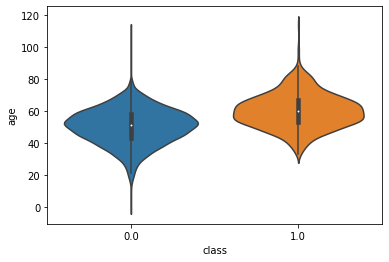

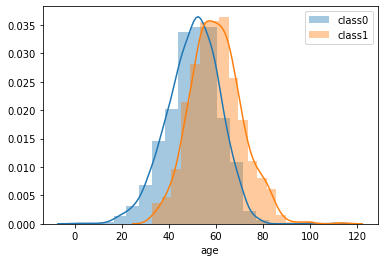

In [103]:
outliers = identify_outliers(data["age"])
print(len(outliers))

visual.univariate_num_to_class(data, "age")

Tento atribut je na hrane dolezitosti podla korelacie voci target atributu, a tak nevieme presne, ako sa mame k nemu spravat. Sice nema najvyssiu korelaciu, ale podla grafu vyssie, je mozne dany atribut povazovat za 2 distribucie na zaklade target atributu. Tak mozme vyskusat obidva approachy, pricom hladame taky, kde budem najmenej outlierov, aby sme vela zaznamov nemuseli vymazavat.

PowerTransformer | metoda: yeo-johnson
Pocet outlierov: 60


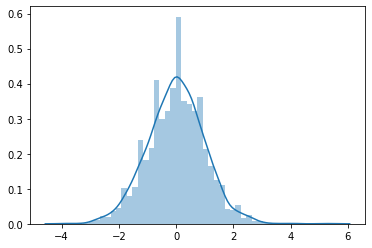

QuantileTransformer
Pocet outlierov: 33


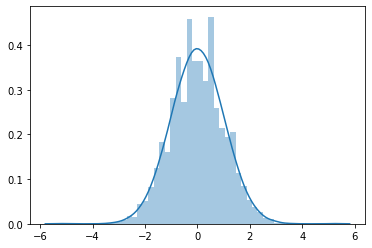

In [104]:
resolving_outliers_transformations(data, "age")

PowerTransformer | metoda: yeo-johnson
Pocet outlierov pri y=0 je: 16
Pocet outlierov pri y=1 je: 6
Korelacia medzi nasim atributom a y: 0.36658660413247224


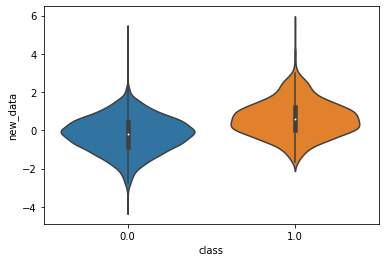

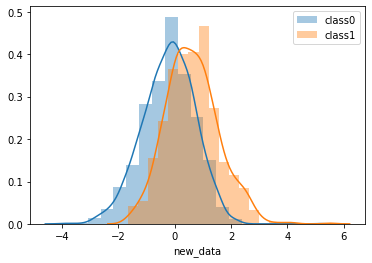



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 22
Korelacia medzi nasim atributom a y: 0.3644613838149733


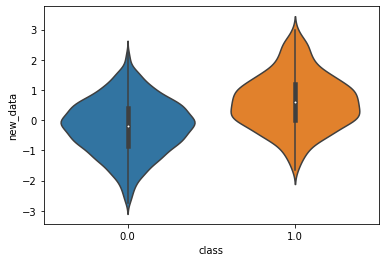

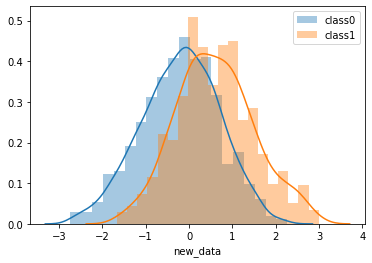


------------------------------------------

QuantileTransformer
Pocet outlierov pri y=0 je: 10
Pocet outlierov pri y=1 je: 2
Korelacia medzi nasim atributom a y: 0.3661863461879476


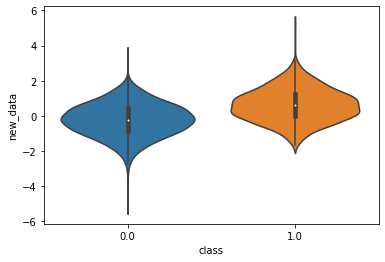

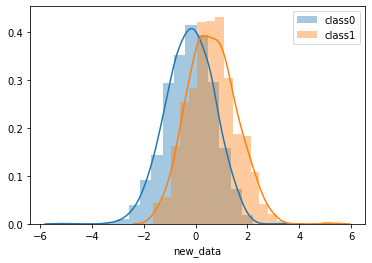



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 12
Korelacia medzi nasim atributom a y: 0.366222216064857


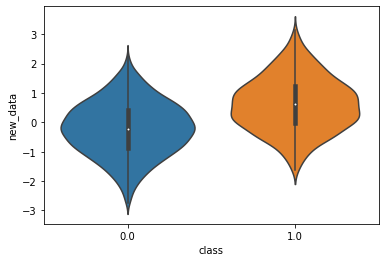

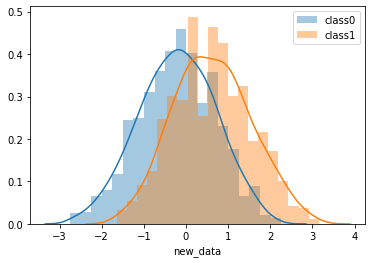


------------------------------------------

Pocet outlierov pri y=0 je: 24
Pocet outlierov pri y=1 je: 5
Bez transformacie - vyskusame len odstranit outliery
Pocet outlierov na odstranenie: 29
Korelacia medzi nasim atributom a y: 0.36205315592884274


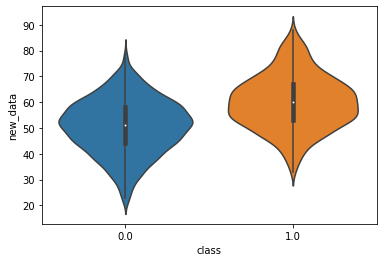

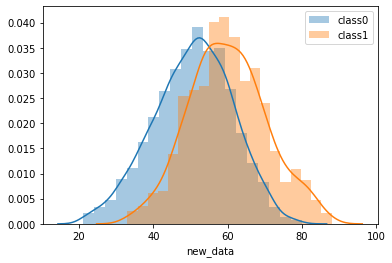


------------------------------------------



In [105]:
resolving_outliers_transformations_to_class(data, "age")

Vidime, ze najmenej outlierov dosahujeme, pokial pouzijeme quantile transformaciu. Nasledne vymazeme dane outliery...

In [106]:
data2 = resolving_outliers_transformations_to_class(data, "age", apply_combination=("QuantileTransformer", True))

## medical_info 

Ako vieme uz z minulej casti, v tomto atribute su ulozene 4 atributy, ktore sa sustreduju na namerane hodnoty mnozstva kyslika v krvi pacientov.

Najprv budeme riesit outliery jednotlivych atributov, a potom spolu naraz im vyriesime missing values cez IterativeImputator

In [107]:
data["mean_oxygen"] = np.nan
data["std_oxygen"] = np.nan
data["kurtosis_oxygen"] = np.nan
data["skewness_oxygen"] = np.nan

In [108]:
def get_oxygen_stats(row):
    
    string = row["medical_info"]
    
    if string is np.nan:
        return row
    
    string = string.replace("\'", "\"")
    di = json.loads(string)
    
    for k in di.keys():
        row[k] = float(di[k])
        
    return row

In [109]:
data = data.apply(get_oxygen_stats, axis=1)
data = data.drop(columns=["medical_info"])

Na zaciatok sa pozrieme na vztahy/korelacie medzi danymi atributmi, predtym nez ich ideme spracuvat

In [110]:
oxygen_attributes = ["mean_oxygen", "std_oxygen", "skewness_oxygen", "kurtosis_oxygen"]

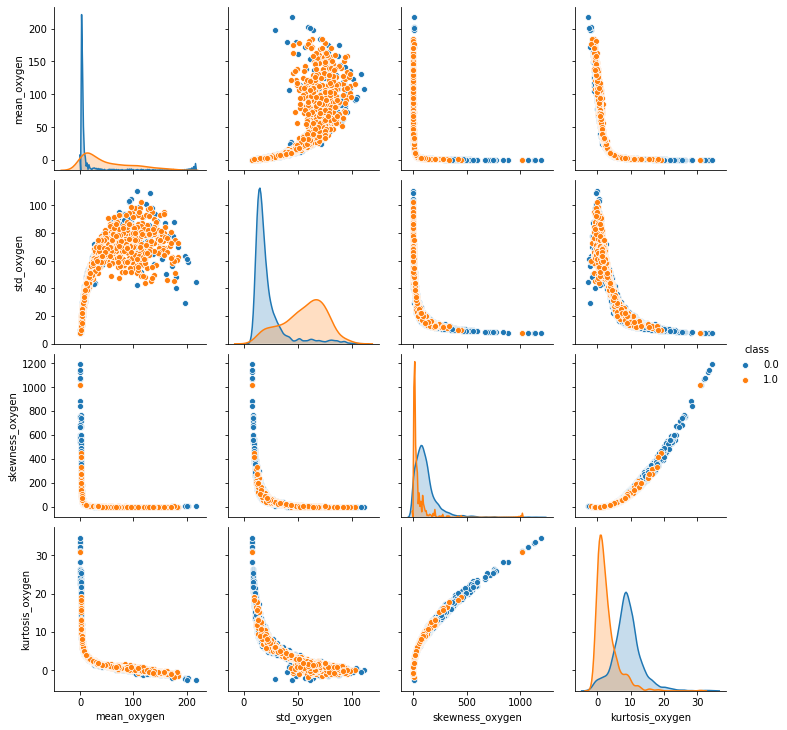

In [111]:
sns.pairplot(data[oxygen_attributes+["class"]], hue="class")

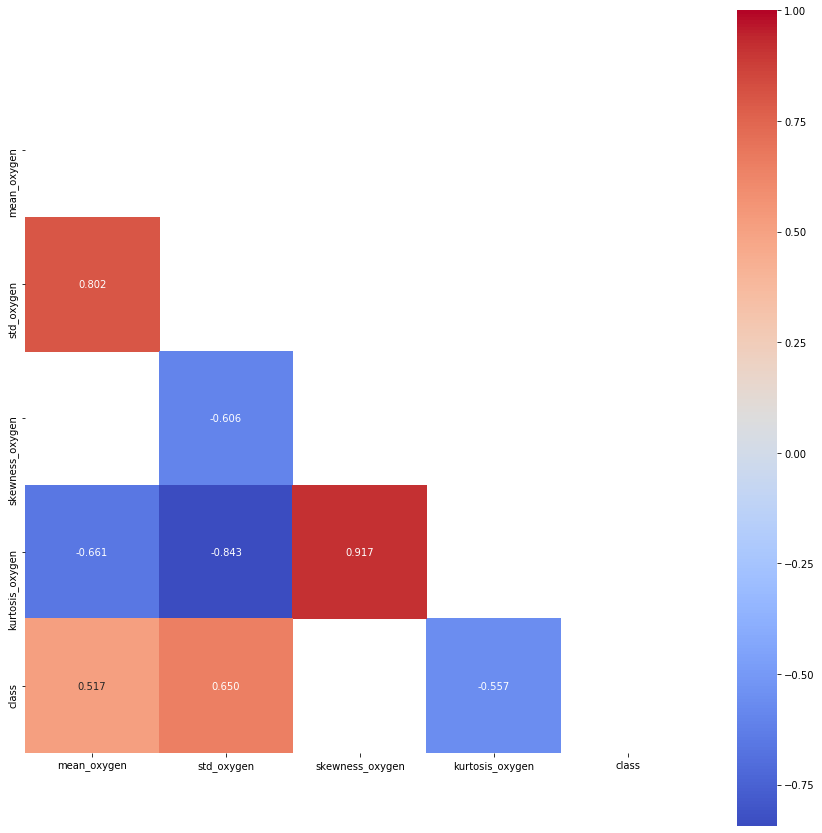

In [112]:
korelacie = data[oxygen_attributes+["class"]].corr()

maska = visual.heatmap_mask(korelacie, threshold=0.5)

visual.f(figsize=(15,15))
sns.heatmap(data=korelacie, cmap="coolwarm", annot=True, fmt=".3f", square=True, mask=maska)

#### mean_oxygen

Pocet outlierov: 693
Korelacia medzi nasim atributom a y: 0.5172635777288903


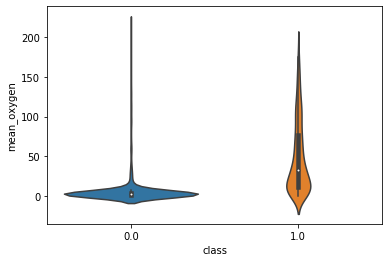

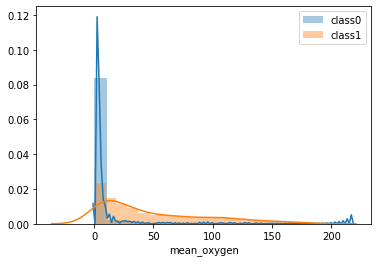

In [113]:
outliers = identify_outliers(data["mean_oxygen"])
print("Pocet outlierov:", len(outliers))

visual.univariate_num_to_class(data, "mean_oxygen", show_regplot=False)

Klucom pri spracovavani outlierov pri vacsine tychto medicinskych merani, je rozdelit si dany atribut podla target atributu. Ako mozno vidiet vyssie, tak vidime, ze dane distribucie hodnot tohto atributu podla hodnoty class su radikalne odlisne.

In [114]:
outliers_per_distributions_to_class(data, "mean_oxygen")

Pocet outlierov pri y=0 je: 358
Pocet outlierov pri y=1 je: 7


365

Uz len tymto rozdelenim hodnot do dvoch distribucii sme sa zbavili polovice outlierov. Keby sme to tak nespravili, tak velke mnozstvo cukrovkarov by bolo odstranenych, i ked oni sami, ked ich porovname k ostatnym cukrovkarom, nie su outliermi.

PowerTransformer | metoda: yeo-johnson
Pocet outlierov pri y=0 je: 189
Pocet outlierov pri y=1 je: 64
Korelacia medzi nasim atributom a y: 0.6424586245681683


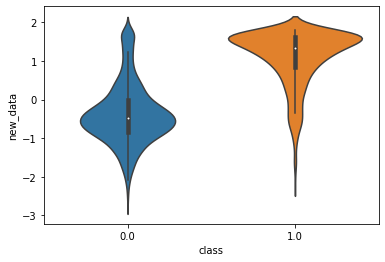

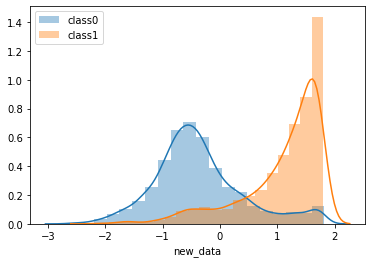



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 253
Korelacia medzi nasim atributom a y: 0.7826942308453162


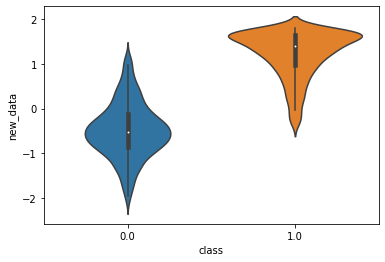

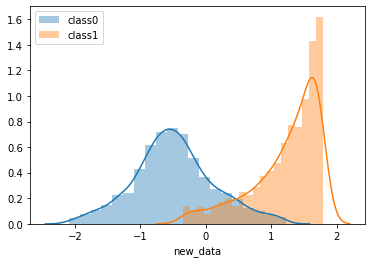


------------------------------------------

QuantileTransformer
Pocet outlierov pri y=0 je: 61
Pocet outlierov pri y=1 je: 58
Korelacia medzi nasim atributom a y: 0.5675786248077387


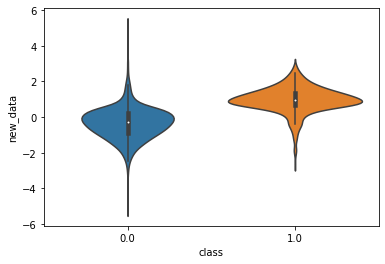

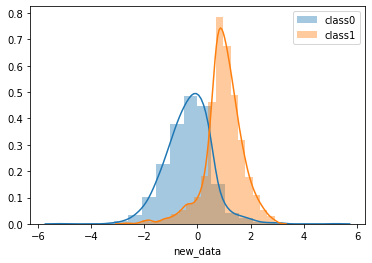



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 119
Korelacia medzi nasim atributom a y: 0.6369240928573673


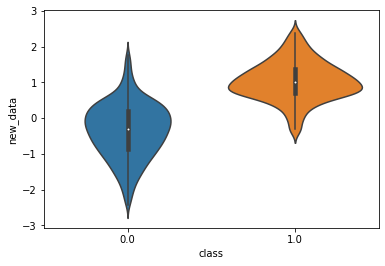

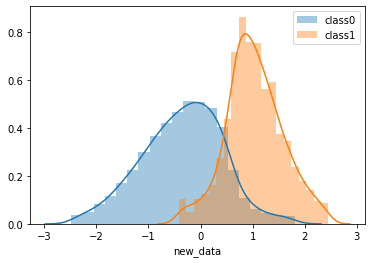


------------------------------------------

Pocet outlierov pri y=0 je: 358
Pocet outlierov pri y=1 je: 7
Bez transformacie - vyskusame len odstranit outliery
Pocet outlierov na odstranenie: 365
Korelacia medzi nasim atributom a y: 0.6576775365977274


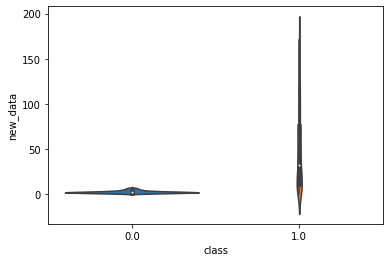

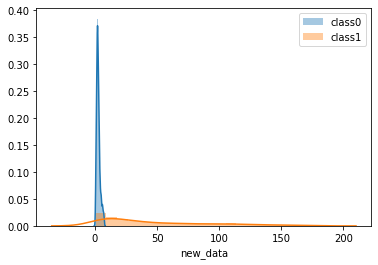


------------------------------------------



In [115]:
resolving_outliers_transformations_to_class(data, "mean_oxygen")

Po vyskusani viacerych kombinacii sme dosli k zaveru, ze pouzitie PowerTransform a nasledne odstranenie outlierov je navhodnejsi sposob, ako sa zbavit outlierov a popritom ziskat najvyssiu korelaciu medzi tymto atributom a target atributom

Korelacia medzi nasim atributom a y: 0.7826942308453162


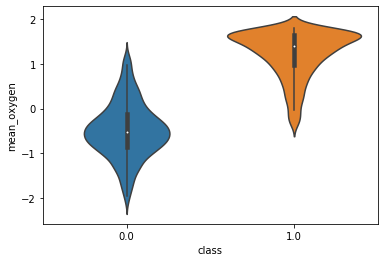

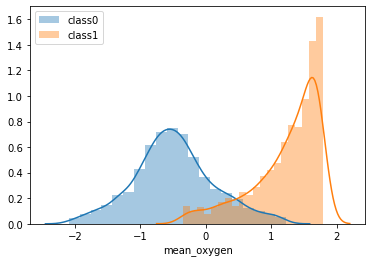

In [119]:
data = resolving_outliers_transformations_to_class(data, "mean_oxygen", apply_combination=("PowerTransformer", True))
visual.univariate_num_to_class(data, "mean_oxygen", show_regplot=False)

#### std_oxygen

Pocet outlierov: 214
Korelacia medzi nasim atributom a y: 0.8290700715754457


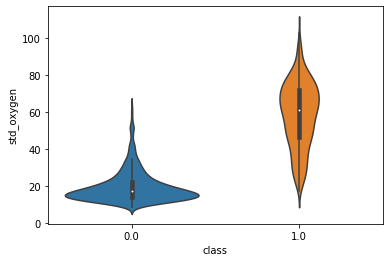

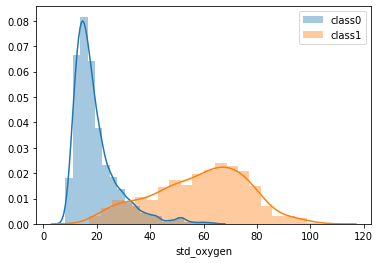

In [120]:
outliers = identify_outliers(data["std_oxygen"])
print("Pocet outlierov:", len(outliers))

visual.univariate_num_to_class(data, "std_oxygen", show_regplot=False)

Pre vsetky atributy kyslika, ako aj glukozy aplikujeme rovnaku proceduru hladania approachu na odstranenie outlierov. Kedze tieto medicinske zaznamy maju velku korelaciu s target atributom "class", tak uvazujeme nad danym atributom, ze je tvoreny 2 distribuciami podla hodnoty "class"

PowerTransformer | metoda: yeo-johnson
Pocet outlierov pri y=0 je: 0
Pocet outlierov pri y=1 je: 63
Korelacia medzi nasim atributom a y: 0.7514757070426079


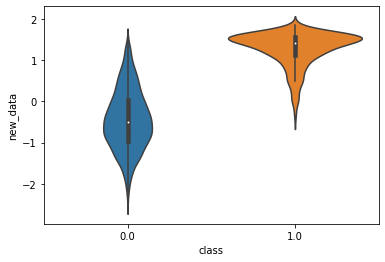

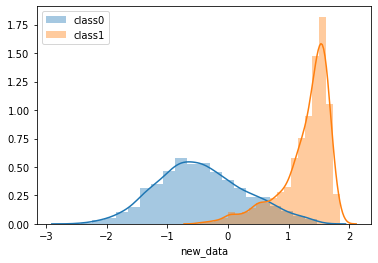



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 63
Korelacia medzi nasim atributom a y: 0.7665379361298532


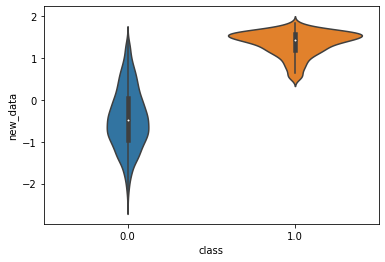

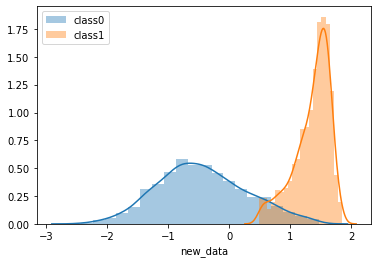


------------------------------------------

QuantileTransformer
Pocet outlierov pri y=0 je: 25
Pocet outlierov pri y=1 je: 19
Korelacia medzi nasim atributom a y: 0.7011287987273416


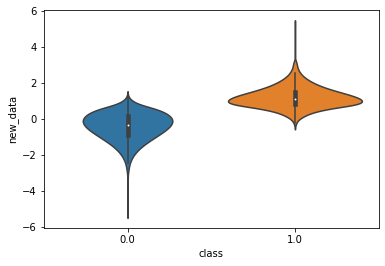

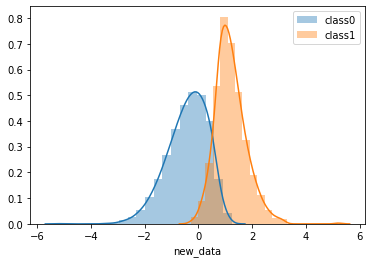



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 44
Korelacia medzi nasim atributom a y: 0.7081901662595874


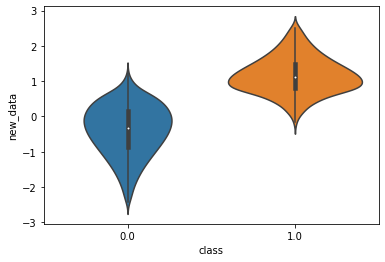

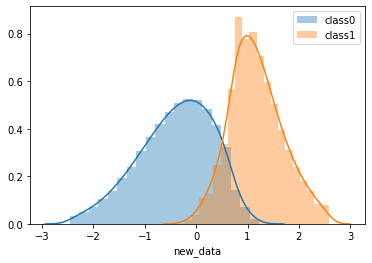


------------------------------------------

Pocet outlierov pri y=0 je: 166
Pocet outlierov pri y=1 je: 0
Bez transformacie - vyskusame len odstranit outliery
Pocet outlierov na odstranenie: 166
Korelacia medzi nasim atributom a y: 0.8682327787656314


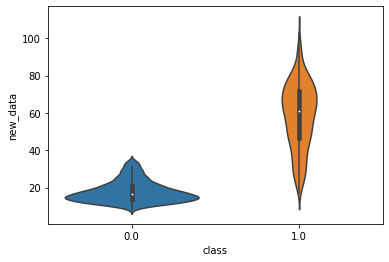

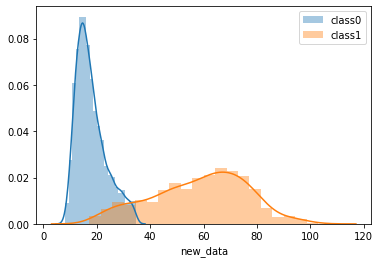


------------------------------------------



In [121]:
resolving_outliers_transformations_to_class(data, "std_oxygen")

V tomto pripade, ziadna transformacia nezlepsuje korelaciu, a tak len odstranime outliery z datasetu

Korelacia medzi nasim atributom a y: 0.8682327787656314


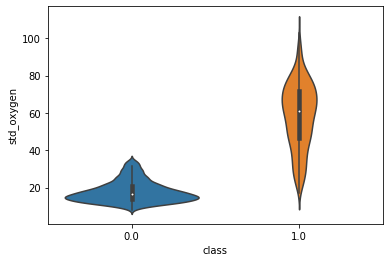

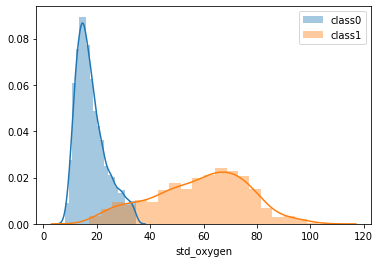

In [122]:
data = resolving_outliers_transformations_to_class(data, "std_oxygen", apply_combination=(None, True))
visual.univariate_num_to_class(data, "std_oxygen", show_regplot=False)

#### skewness_oxygen

Pocet outlierov: 151
Korelacia medzi nasim atributom a y: -0.5418146632710122


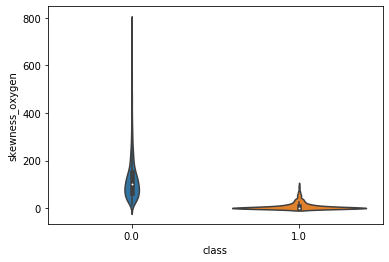

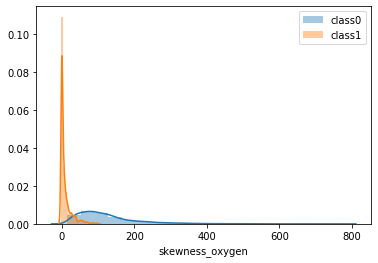

In [123]:
outliers = identify_outliers(data["skewness_oxygen"])
print("Pocet outlierov:", len(outliers))

visual.univariate_num_to_class(data, "skewness_oxygen", show_regplot=False)

PowerTransformer | metoda: yeo-johnson
Pocet outlierov pri y=0 je: 65
Pocet outlierov pri y=1 je: 10
Korelacia medzi nasim atributom a y: -0.7822914720923217


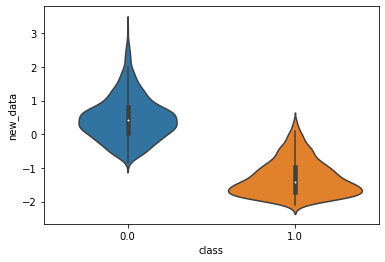

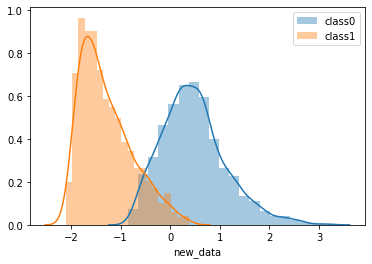



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 75
Korelacia medzi nasim atributom a y: -0.8074705821985075


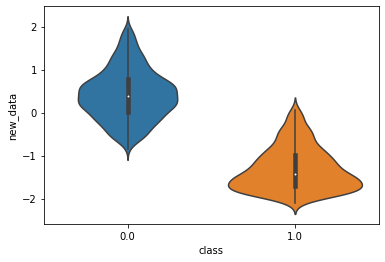

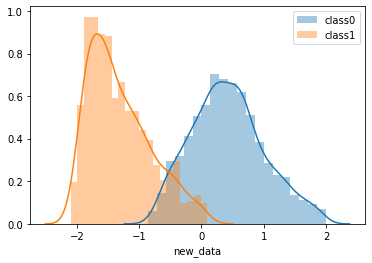


------------------------------------------

QuantileTransformer
Pocet outlierov pri y=0 je: 25
Pocet outlierov pri y=1 je: 28
Korelacia medzi nasim atributom a y: -0.7200214865784271


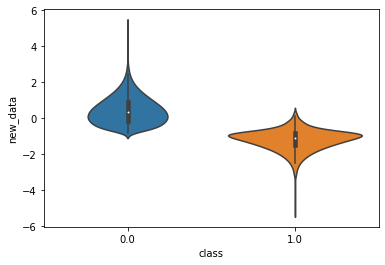

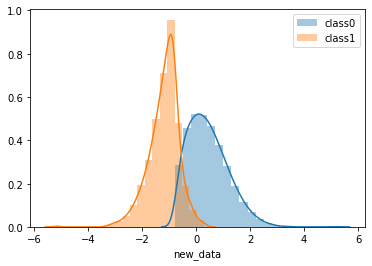



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 53
Korelacia medzi nasim atributom a y: -0.7290883769738008


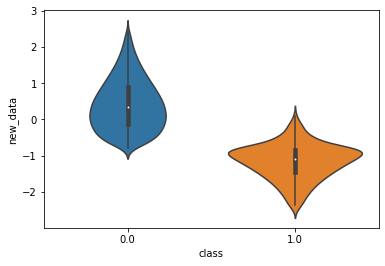

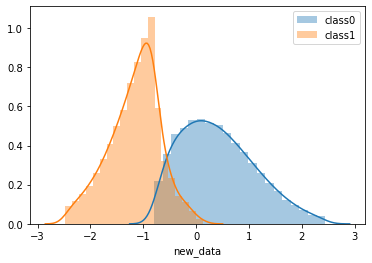


------------------------------------------

Pocet outlierov pri y=0 je: 160
Pocet outlierov pri y=1 je: 102
Bez transformacie - vyskusame len odstranit outliery
Pocet outlierov na odstranenie: 262
Korelacia medzi nasim atributom a y: -0.6597229460710929


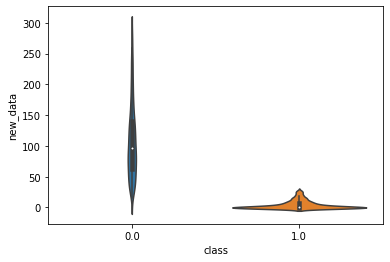

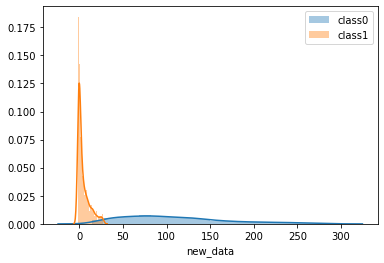


------------------------------------------



In [124]:
resolving_outliers_transformations_to_class(data, "skewness_oxygen")

Tu najvyhodnejsou kombinaciou je znova pouzitie PowerTransformer-a spolu s odstranenim outlierov

Korelacia medzi nasim atributom a y: -0.8074705821985075


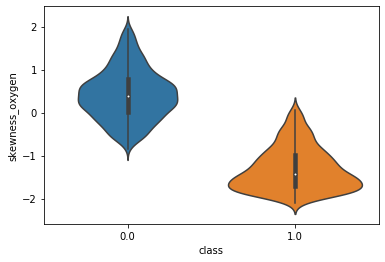

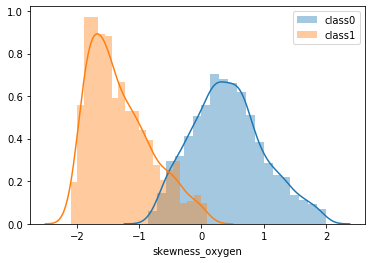

In [125]:
data = resolving_outliers_transformations_to_class(data, "skewness_oxygen", apply_combination=("PowerTransformer", True))
visual.univariate_num_to_class(data, "skewness_oxygen", show_regplot=False)

#### kurtosis_oxygen

Pocet outlierov: 0
Korelacia medzi nasim atributom a y: -0.7791333092692233


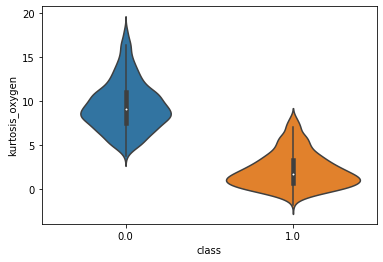

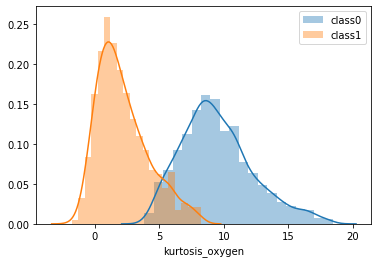

In [126]:
outliers = identify_outliers(data["kurtosis_oxygen"])
print("Pocet outlierov:", len(outliers))

visual.univariate_num_to_class(data, "kurtosis_oxygen", show_regplot=False)

PowerTransformer | metoda: yeo-johnson
Pocet outlierov pri y=0 je: 46
Pocet outlierov pri y=1 je: 11
Korelacia medzi nasim atributom a y: -0.7889306353348208


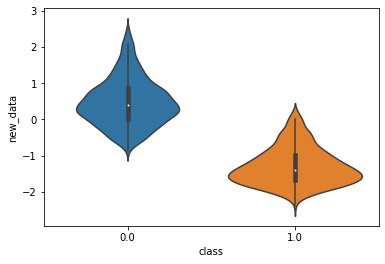

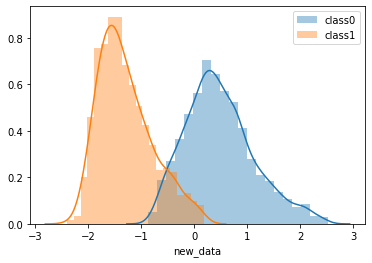



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 57
Korelacia medzi nasim atributom a y: -0.804835856634762


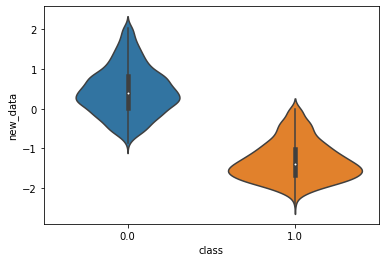

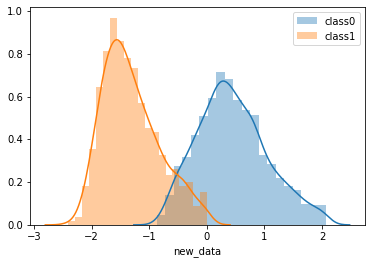


------------------------------------------

QuantileTransformer
Pocet outlierov pri y=0 je: 25
Pocet outlierov pri y=1 je: 23
Korelacia medzi nasim atributom a y: -0.7245445916426463


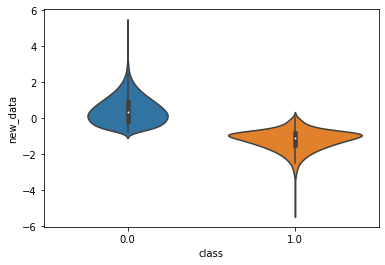

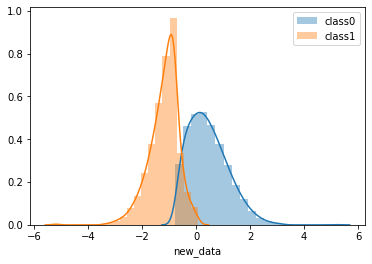



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 48
Korelacia medzi nasim atributom a y: -0.7318655746897763


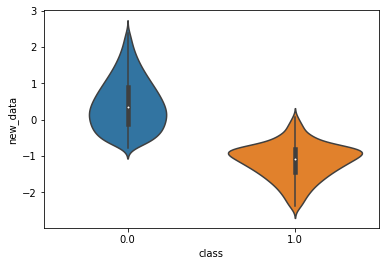

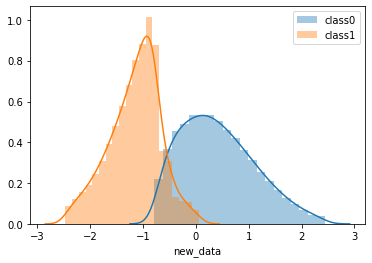


------------------------------------------

Pocet outlierov pri y=0 je: 51
Pocet outlierov pri y=1 je: 20
Bez transformacie - vyskusame len odstranit outliery
Pocet outlierov na odstranenie: 71
Korelacia medzi nasim atributom a y: -0.8002685586063312


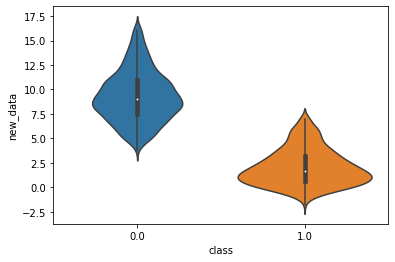

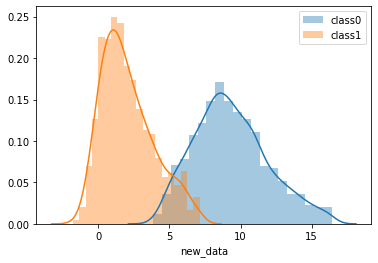


------------------------------------------



In [127]:
resolving_outliers_transformations_to_class(data, "kurtosis_oxygen")

Tu su 2 velmi podobne approache, ktore viacmenej dosahuju rovnake vysledky, a to PowerTransformer + odstranenie outlierov, a cisto odstranenie outlierov. No kombinacia s transformaciou zabezpecuje o trosku lepsiu korelaciu a menej potrebnych outlierov na odstranenie, a tak si vyberame prave ju.

Korelacia medzi nasim atributom a y: -0.804835856634762


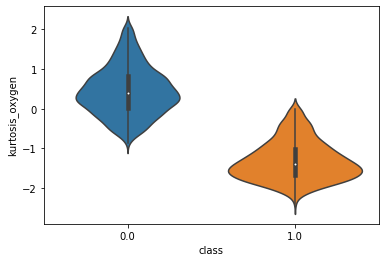

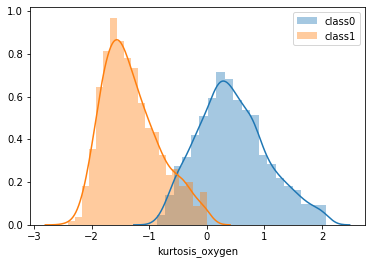

In [128]:
data = resolving_outliers_transformations_to_class(data, "kurtosis_oxygen", apply_combination=("PowerTransformer", True))
visual.univariate_num_to_class(data, "kurtosis_oxygen", show_regplot=False)

Teraz sa mozme sustredit na imputaciu missing values

In [129]:
data[oxygen_attributes].isnull().sum()

mean_oxygen        9
std_oxygen         9
skewness_oxygen    9
kurtosis_oxygen    9
dtype: int64

In [130]:
data[oxygen_attributes].isnull().all(axis=1).sum()

9

Sice vieme celkom dobre nahradit nejake chybajuce hodnoty atributov merani kyslika a glukozy na zaklade korelacie s inymi meraniami, vidime, ze prave 9 pacientov nema ziaden atribut o kysliku, inak povedane, maju atribut medical_info == NaN.

A toto by sme si uz moc trufali imputaciu atributov kyslika, pokial nemame ziadne hodnoty pre vsetky atributy kyslika. Tak ich iba jednoducho dropneme...

In [131]:
idx = data[data[oxygen_attributes].isnull().all(axis=1)].index.values
data = data.drop(index=idx)

Mozeme sa teraz pozriet na pairplot medzi atributmi kysliku, ako sme vlastne vycistili dataset a zmenili vztahy medzi nimi.

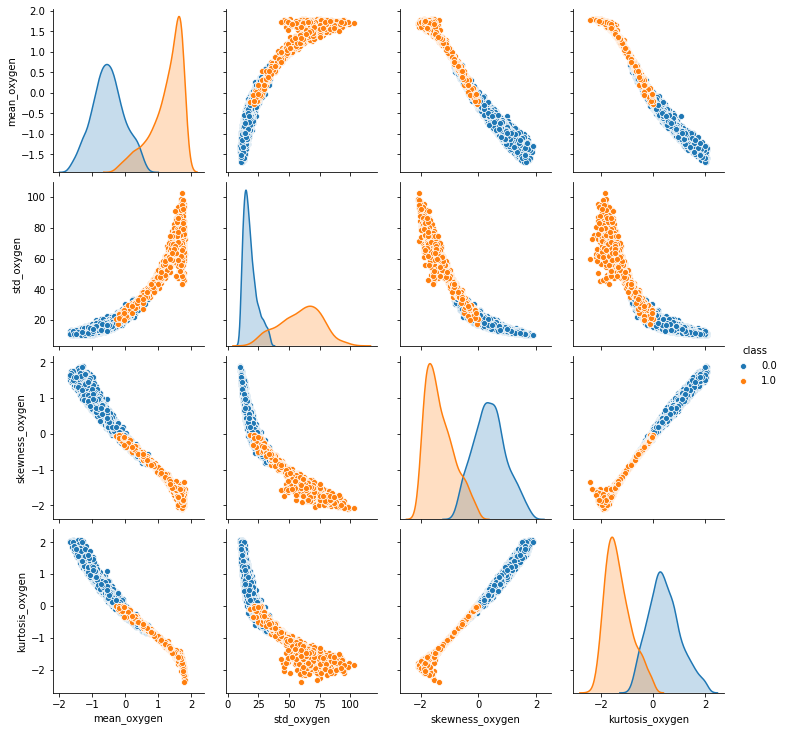

In [132]:
sns.pairplot(data[oxygen_attributes+["class"]], hue="class")

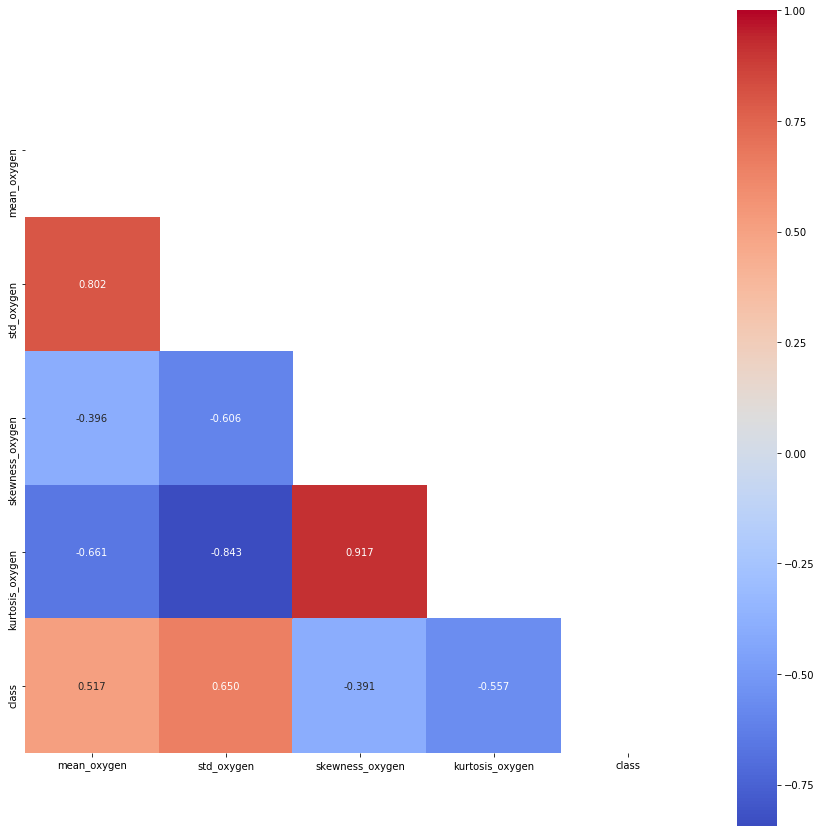

In [133]:
korelacie2 = data[oxygen_attributes+["class"]].corr()

maska = visual.heatmap_mask(korelacie2, threshold=0.5)

visual.f(figsize=(15,15))
sns.heatmap(data=korelacie, cmap="coolwarm", annot=True, fmt=".3f", square=True, mask=maska)

Este mozeme vypocitat, o kolko sme zlepsili dane korelacie

In [134]:
zmeny_korelacie = korelacie2.abs() - korelacie.abs()

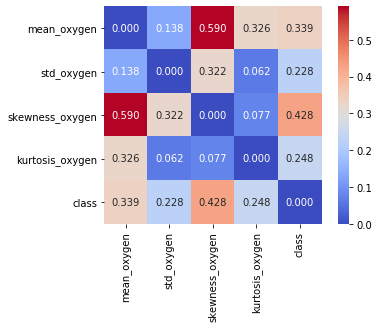

In [135]:
sns.heatmap(data=zmeny_korelacie, cmap="coolwarm", annot=True, fmt=".3f", square=True)

Ako mozno vidiet, ziadne korelacie som nezhorsil, len zlepsil medzi atributmi kyslika, resp. target atributu

In [136]:
asdas dasd asd asd asd asd ada sdas dasd asd

SyntaxError: invalid syntax (<ipython-input-136-26403071d54d>, line 1)

# Atributy glukozy

# FEEDBACK -----------------------------------------------------

Trosku som ti zmenil rutinu okolo glukozy, bummer. Ale to len skopirujes viac-menej zo 5 riadkov pri kazdom atribute, takze to nic nie je.

Spravis tie iste commandy ako ja pre jednotlive kysliky, pricom nasledne vyberies kombinaciu, ktora je najlepsia. Zvacsa vyberas podla korelacie, druhotna metrika je pocet outlierov. Samozrejme, pokial by si mal o 1000 outlierov viac vymazat, aby si ziskal, povedzme korelaciu 0.85 namiesto 0.8, tak samozrejme zoberieme tu mensiu korelaciu.

Pridaj tam aj pred spracovanim, aj po pairploty a heatmapy, ako ja teda.

In [137]:
glucose_attributes = ["skewness_glucose", "kurtosis_glucose", "mean_glucose", "std_glucose"]

In [138]:
data['mean_glucose'] = pd.to_numeric(data['mean_glucose'], errors= 'coerce')

Pretipujeme si mean_glucose aby sme s nim vedeli pracovat. Povodne bol vedeny ako string, zmenili sme ho na float

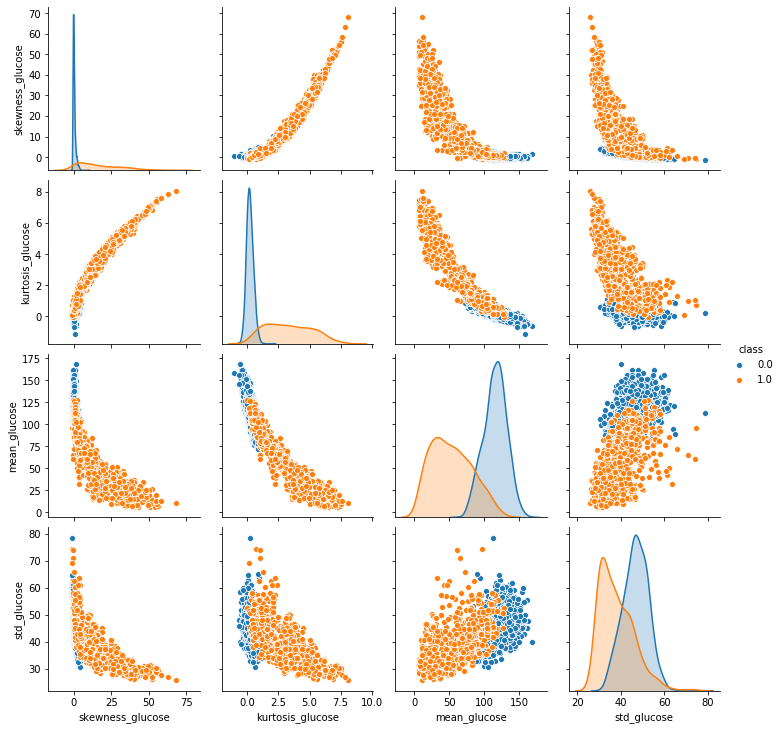

In [139]:
sns.pairplot(data[glucose_attributes+["class"]], hue="class")

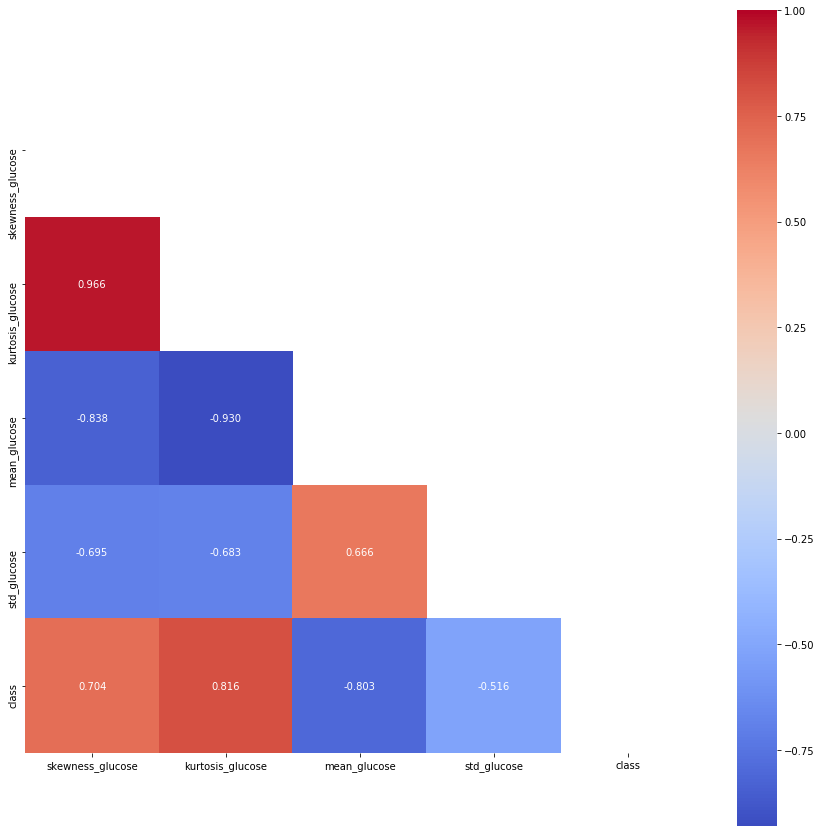

In [140]:
korelacie = data[glucose_attributes+["class"]].corr()

maska = visual.heatmap_mask(korelacie, threshold=0.5)

visual.f(figsize=(15,15))
sns.heatmap(data=korelacie, cmap="coolwarm", annot=True, fmt=".3f", square=True, mask=maska)

#### skewness_glucose

Pocet outlierov: 629
Korelacia medzi nasim atributom a y: 0.7038573827329189


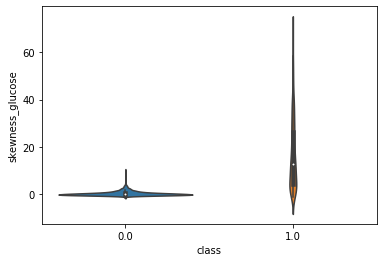

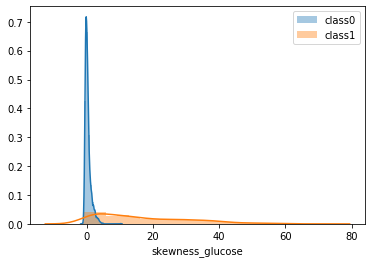

In [141]:
outliers = identify_outliers(data["skewness_glucose"])
print("Pocet outlierov:", len(outliers))

visual.univariate_num_to_class(data, "skewness_glucose", show_regplot=False)

In [142]:
outliers_per_distributions_to_class(data, "skewness_glucose")

Pocet outlierov pri y=0 je: 170
Pocet outlierov pri y=1 je: 2


172

PowerTransformer | metoda: yeo-johnson
Pocet outlierov pri y=0 je: 12
Pocet outlierov pri y=1 je: 47
Korelacia medzi nasim atributom a y: 0.753776310498792


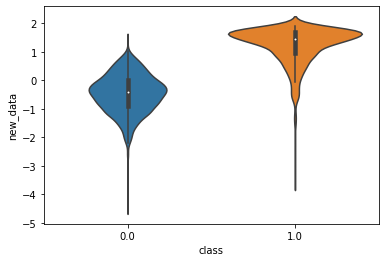

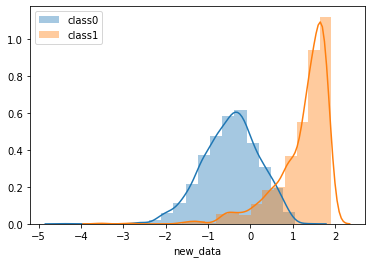



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 59
Korelacia medzi nasim atributom a y: 0.7950881236115538


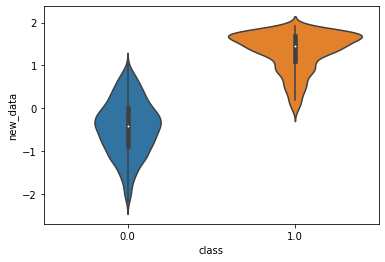

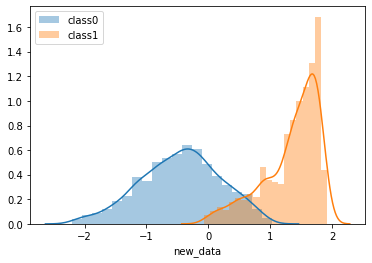


------------------------------------------

QuantileTransformer
Pocet outlierov pri y=0 je: 21
Pocet outlierov pri y=1 je: 55
Korelacia medzi nasim atributom a y: 0.6872301667230334


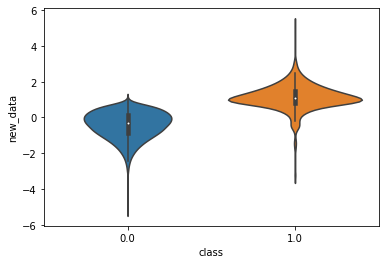

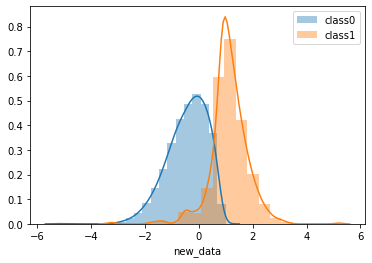



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 76
Korelacia medzi nasim atributom a y: 0.7201711400960171


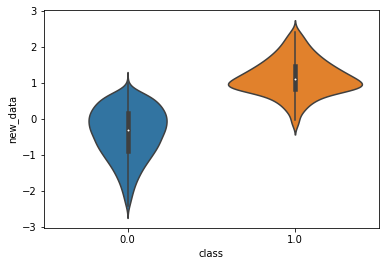

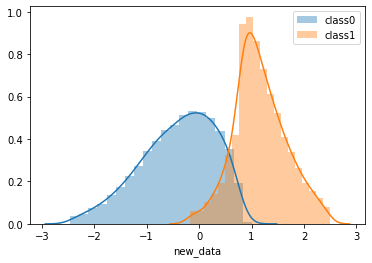


------------------------------------------

Pocet outlierov pri y=0 je: 170
Pocet outlierov pri y=1 je: 2
Bez transformacie - vyskusame len odstranit outliery
Pocet outlierov na odstranenie: 172
Korelacia medzi nasim atributom a y: 0.707614988312163


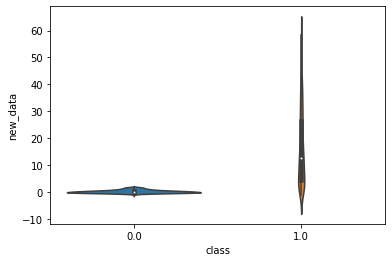

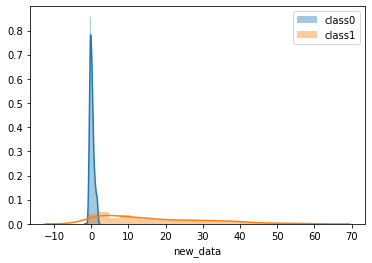


------------------------------------------



In [143]:
resolving_outliers_transformations_to_class(data, "skewness_glucose")

Korelacia medzi nasim atributom a y: 0.7950881236115538


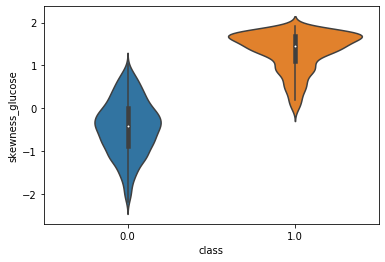

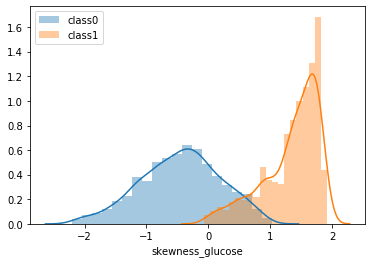

In [144]:
data = resolving_outliers_transformations_to_class(data, "skewness_glucose", apply_combination=("PowerTransformer", True))
visual.univariate_num_to_class(data, "skewness_glucose", show_regplot=False)

#### kurtosis_glucose

Pocet outlierov: 577
Korelacia medzi nasim atributom a y: 0.8391645746405144


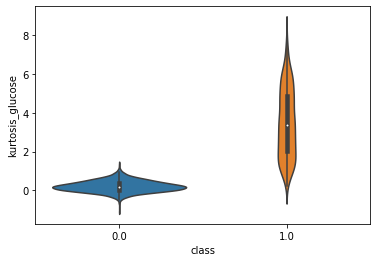

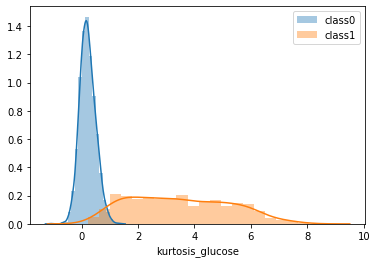

In [145]:
outliers = identify_outliers(data["kurtosis_glucose"])
print("Pocet outlierov:", len(outliers))

visual.univariate_num_to_class(data, "kurtosis_glucose", show_regplot=False)

PowerTransformer | metoda: yeo-johnson
Pocet outlierov pri y=0 je: 64
Pocet outlierov pri y=1 je: 18
Korelacia medzi nasim atributom a y: 0.816933196249525


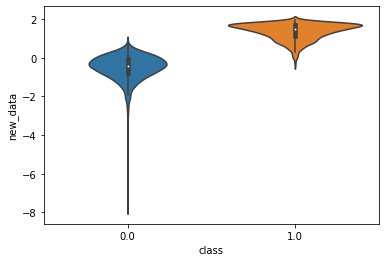

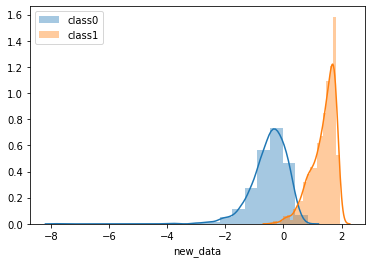



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 82
Korelacia medzi nasim atributom a y: 0.8567891983971527


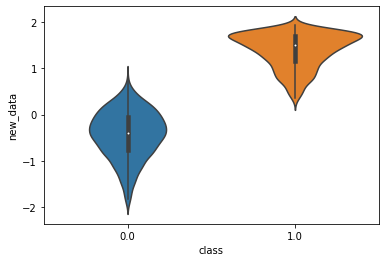

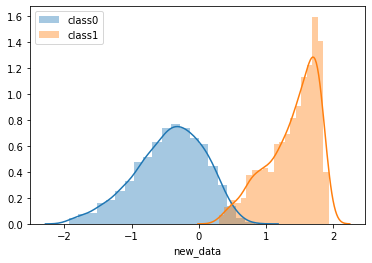


------------------------------------------

QuantileTransformer
Pocet outlierov pri y=0 je: 24
Pocet outlierov pri y=1 je: 23
Korelacia medzi nasim atributom a y: 0.7331883884485707


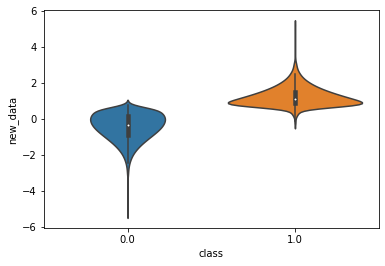

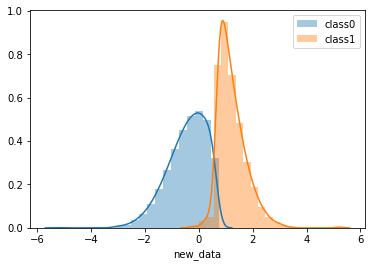



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 47
Korelacia medzi nasim atributom a y: 0.741466185784164


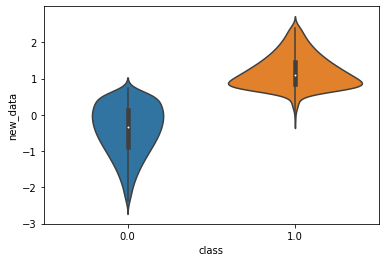

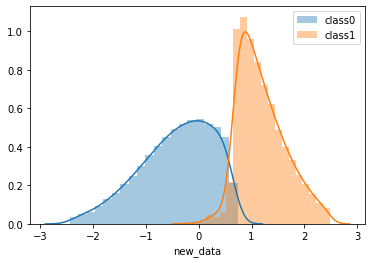


------------------------------------------

Pocet outlierov pri y=0 je: 25
Pocet outlierov pri y=1 je: 0
Bez transformacie - vyskusame len odstranit outliery
Pocet outlierov na odstranenie: 25
Korelacia medzi nasim atributom a y: 0.8400573415971034


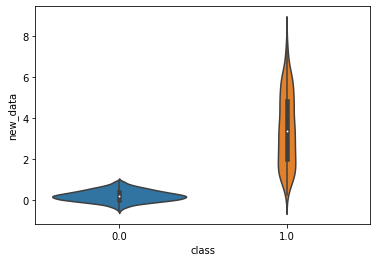

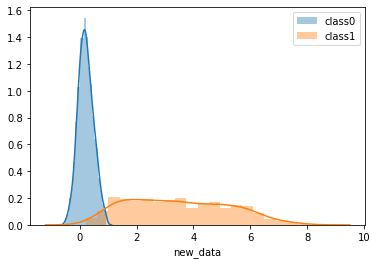


------------------------------------------



In [146]:
resolving_outliers_transformations_to_class(data, "kurtosis_glucose")

Korelacia medzi nasim atributom a y: 0.8567891983971527


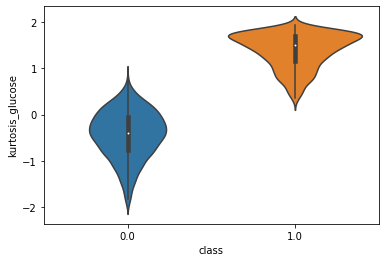

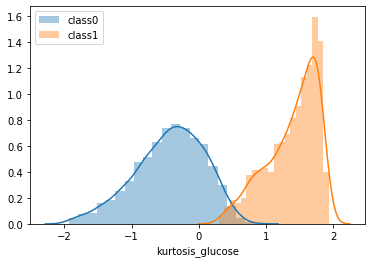

In [147]:
data = resolving_outliers_transformations_to_class(data, "kurtosis_glucose", apply_combination=("PowerTransformer", True))
visual.univariate_num_to_class(data, "kurtosis_glucose", show_regplot=False)

#### mean_glucose

Atribut mean_glucose sme museli pretipovat lebo bol vedeny ako object

Pocet outlierov: 114
Korelacia medzi nasim atributom a y: -0.8372625060370374


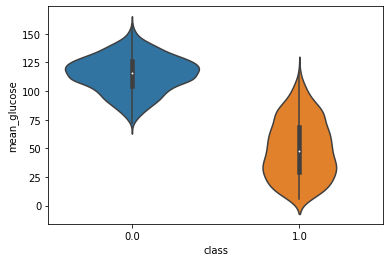

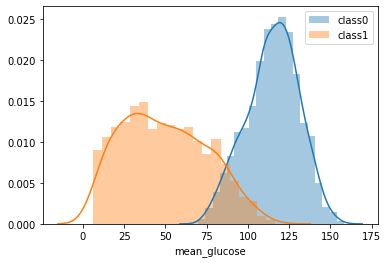

In [148]:
outliers = identify_outliers(data["mean_glucose"])
print("Pocet outlierov:", len(outliers))

visual.univariate_num_to_class(data, "mean_glucose", show_regplot=False)

PowerTransformer | metoda: yeo-johnson
Pocet outlierov pri y=0 je: 3
Pocet outlierov pri y=1 je: 4
Korelacia medzi nasim atributom a y: -0.8142519901470724


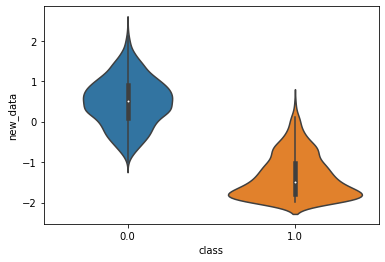

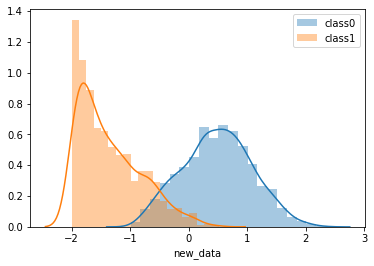



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 7
Korelacia medzi nasim atributom a y: -0.8176050916271981


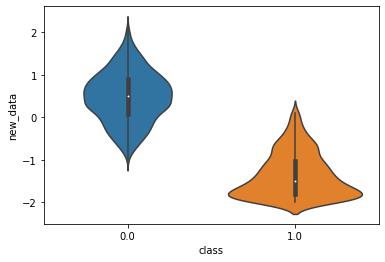

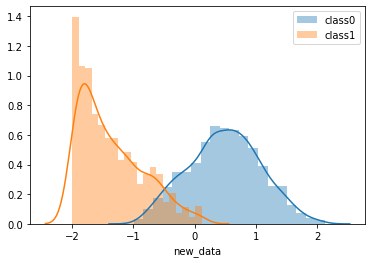


------------------------------------------

QuantileTransformer
Pocet outlierov pri y=0 je: 22
Pocet outlierov pri y=1 je: 21
Korelacia medzi nasim atributom a y: -0.7198804788801317


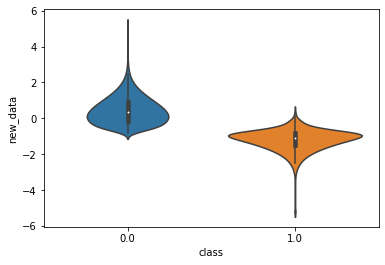

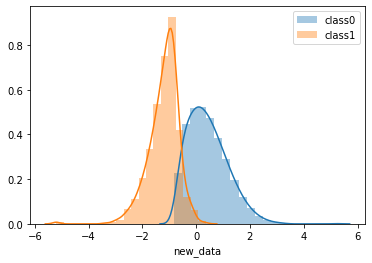



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 43
Korelacia medzi nasim atributom a y: -0.7298363695087164


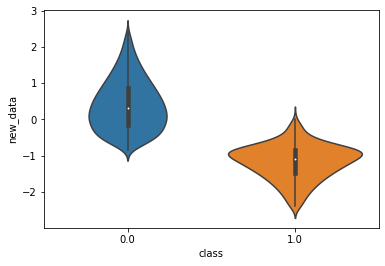

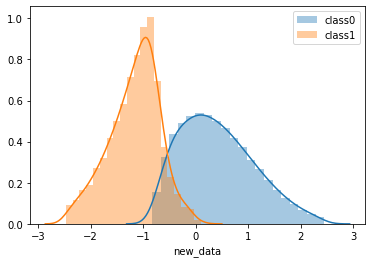


------------------------------------------

Pocet outlierov pri y=0 je: 1
Pocet outlierov pri y=1 je: 0
Bez transformacie - vyskusame len odstranit outliery
Pocet outlierov na odstranenie: 1
Korelacia medzi nasim atributom a y: -0.8375757773264653


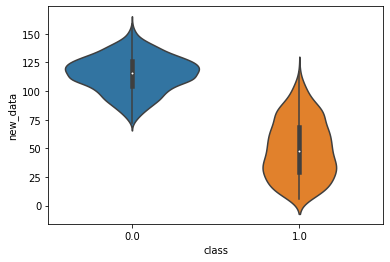

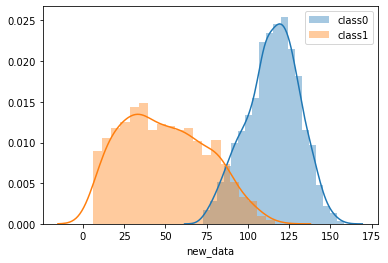


------------------------------------------



In [149]:
resolving_outliers_transformations_to_class(data, "mean_glucose")

Korelacia medzi nasim atributom a y: -0.8375757773264653


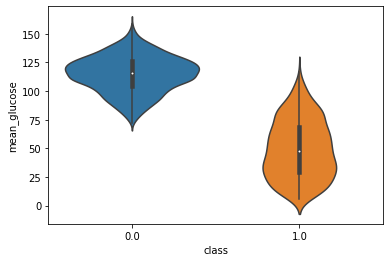

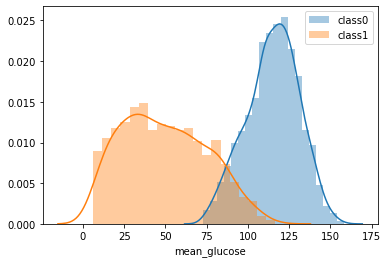

In [150]:
data = resolving_outliers_transformations_to_class(data, "mean_glucose", apply_combination=(None, True))
visual.univariate_num_to_class(data, "mean_glucose", show_regplot=False)

#### std_glucose

Pocet outlierov: 0
Korelacia medzi nasim atributom a y: -0.5687950086896483


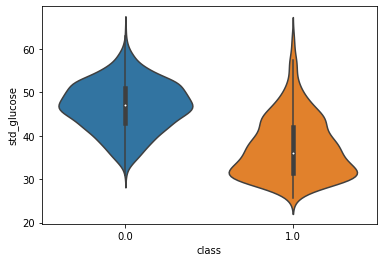

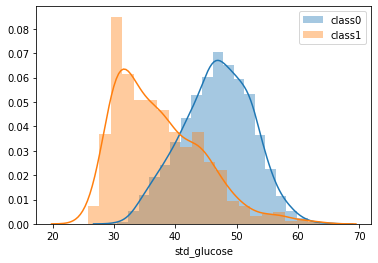

In [151]:
outliers = identify_outliers(data["std_glucose"])
print("Pocet outlierov:", len(outliers))

visual.univariate_num_to_class(data, "std_glucose", show_regplot=False)

PowerTransformer | metoda: yeo-johnson
Pocet outlierov pri y=0 je: 3
Pocet outlierov pri y=1 je: 16
Korelacia medzi nasim atributom a y: -0.5516083878496671


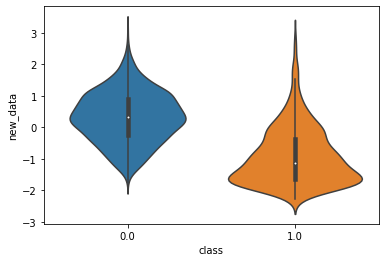

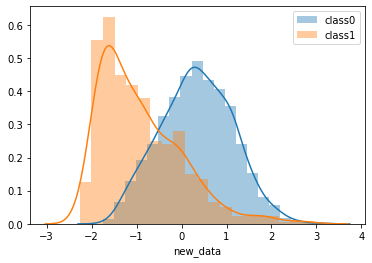



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 19
Korelacia medzi nasim atributom a y: -0.5837486814854724


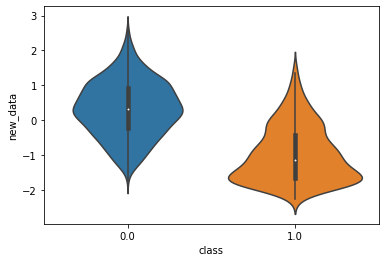

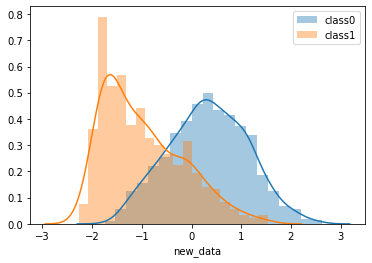


------------------------------------------

QuantileTransformer
Pocet outlierov pri y=0 je: 12
Pocet outlierov pri y=1 je: 23
Korelacia medzi nasim atributom a y: -0.5370244960582072


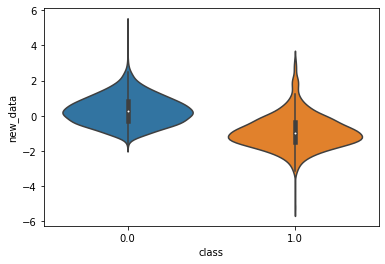

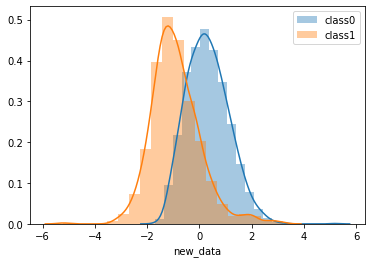



Vyskusame odstranit vsetky outliery z danej hornej distribucie
Pocet outlierov na odstranenie: 35
Korelacia medzi nasim atributom a y: -0.5816508683066662


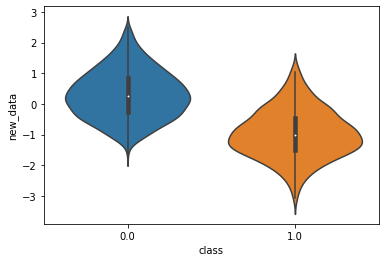

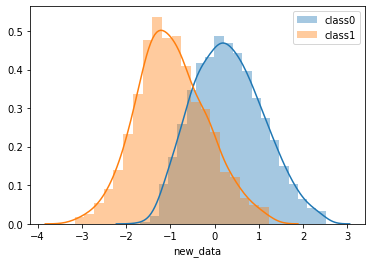


------------------------------------------

Pocet outlierov pri y=0 je: 3
Pocet outlierov pri y=1 je: 8
Bez transformacie - vyskusame len odstranit outliery
Pocet outlierov na odstranenie: 11
Korelacia medzi nasim atributom a y: -0.5862583077792035


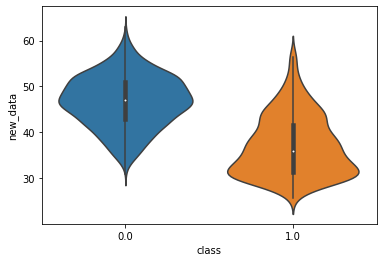

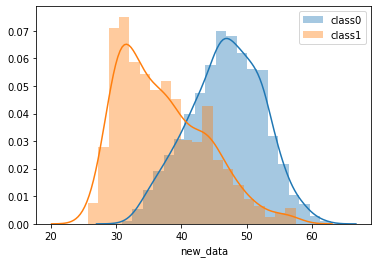


------------------------------------------



In [152]:
resolving_outliers_transformations_to_class(data, "std_glucose")

Korelacia medzi nasim atributom a y: -0.5862583077792035


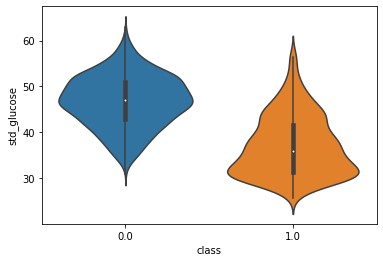

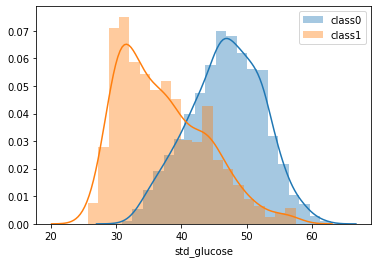

In [153]:
data = resolving_outliers_transformations_to_class(data, "std_glucose", apply_combination=(None, True))
visual.univariate_num_to_class(data, "std_glucose", show_regplot=False)

In [154]:
data[glucose_attributes].isnull().sum()

skewness_glucose      5
kurtosis_glucose      2
mean_glucose        323
std_glucose         331
dtype: int64

In [155]:
data[glucose_attributes].isnull().all(axis=1).sum()

0

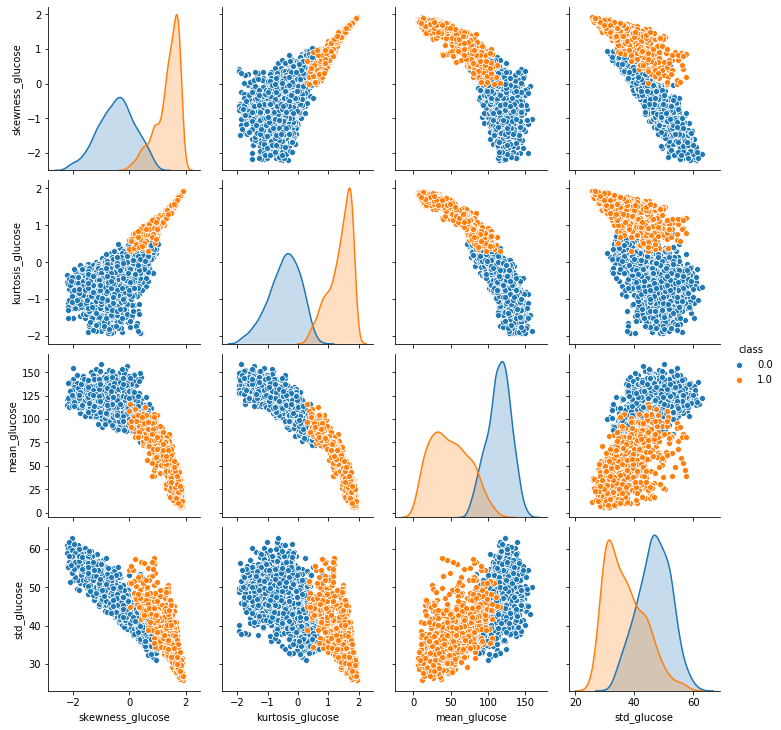

In [156]:
sns.pairplot(data[glucose_attributes+["class"]], hue="class")

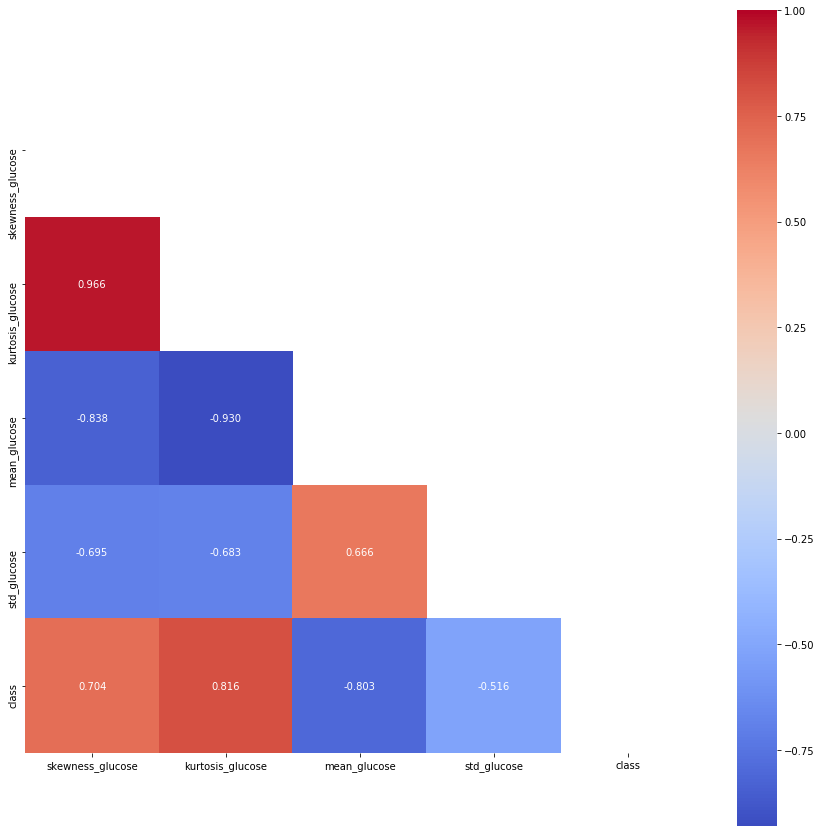

In [157]:
korelacie2 = data[glucose_attributes+["class"]].corr()

maska = visual.heatmap_mask(korelacie2, threshold=0.5)

visual.f(figsize=(15,15))
sns.heatmap(data=korelacie, cmap="coolwarm", annot=True, fmt=".3f", square=True, mask=maska)

In [158]:
zmeny_korelacie = korelacie2.abs() - korelacie.abs()

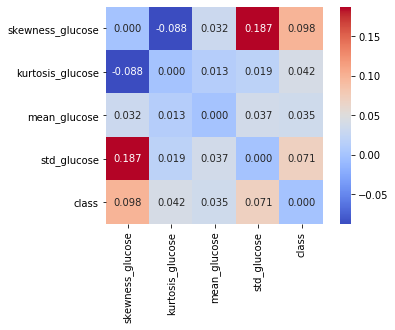

In [159]:
sns.heatmap(data=zmeny_korelacie, cmap="coolwarm", annot=True, fmt=".3f", square=True)

# FEEDBACK ----------------------------------------------------------

na nahradenie chybajucich dat sa pouzije IterativeImputer, netreba ani funkciu moju pouzit, lebo ide o same ciselne hodnoty. 

Tuto by som potreboval pomoct ze ako mam nahradit chybajuce data

Toto je basic layout, ako budeme postupne tvorit velky PIPELINE, do ktoreho vsetok preprocessing hodime. Avsak mozme tam hodit iba veci, pri ktorych nepracujeme s target triedou y, teda v PIPELINE neodstranujeme samples.

In [ ]:
class TransformaciaMS_Relationship(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self):
        self.ordinal_encoder = None
        self.iterative_imputer = None
        
    def fit(self, X, y=None):
        
        print("FIT")
        
        columns = X.columns.values

        null_values = pd.DataFrame(index=pd.Index([-1]), columns=columns, data=[[np.nan for i in range(len(columns))]])
        X = pd.concat([null_values,X])

        self.ordinal_encoder = ce.ordinal.OrdinalEncoder(handle_missing="return_nan", handle_unknown="return_nan")
        X = self.ordinal_encoder.fit_transform(X)
        
        X = X[1:]

        self.iterative_imputer = impute.IterativeImputer(max_iter=20, random_state=42, initial_strategy="most_frequent", 
                                              min_value=X.min(), max_value=X.max())

        
        try:
            X = self.iterative_imputer.fit(X)
        except (ValueError, np.linalg.LinAlgError):
            print("Jeden error bol trapnuty, kedy funkcii vadili NaNs. Tento error je ale divny, lebo mu to vadi", \
              "len prvy krat, a potom to uz ide...")
            X = self.iterative_imputer.fit(X)
            
        return self
               

    def transform(self, X):
        print("TRANSFORM")
        columns = X.columns.values
    
        X = self.ordinal_encoder.transform(X)
        X = self.iterative_imputer.transform(X).round()
        
        X = pd.DataFrame(data=X, columns=columns)
        
        X = self.ordinal_encoder.inverse_transform(X)
        
        return X
    

In [ ]:
pip = pipeline.Pipeline(steps=[
    ("moja_transf", TransformaciaMS_Relationship()),
    ("one_hot_enc", preprocessing.OneHotEncoder())
])


col_transform = compose.ColumnTransformer(transformers=[
        ('vztahy', pip, ["marital-status", "relationship"])
    ])

PIPE = pipeline.Pipeline(steps=[
    ("transform", col_transform),
    ("model", svm.SVR())
])

# Znovupoužiteľnosť predspracovania